In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('data/final/late_12_months.csv', index_col='patient')

# List features/outputs
outcomes = [
    'CTCAE_xerostomia',
    'CTCAE_sdi',
    'CTCAE_dysphagia',
    'EORTC_dry_mouth',
    'EORTC_taste',
    'EORTC_sticky_saliva',
    'LENT/SOM_subj_xer',
    'LENT/SOM_man_xer'
]
features = list(df.drop(outcomes, axis=1).columns)

# Replace NaN values with zero
#df = df.fillna(0)

# Counts for each outcome
pd.DataFrame({outcome: df[outcome].value_counts() for outcome in outcomes})

CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  EORTC_dry_mouth  EORTC_taste  \
0               132        105              149               97          116   
1                50         77               33               85           66   

   EORTC_sticky_saliva  LENT/SOM_subj_xer  LENT/SOM_man_xer  
0                  129                 97               121  
1                   53                 85                61

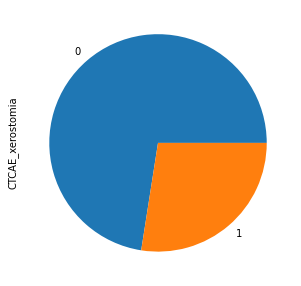

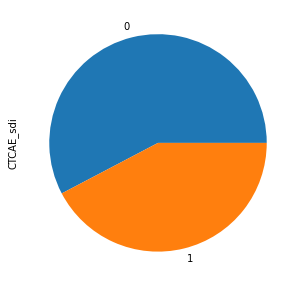

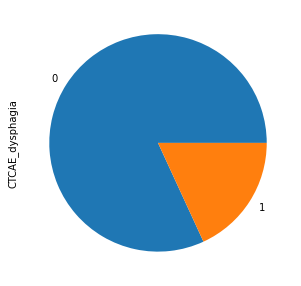

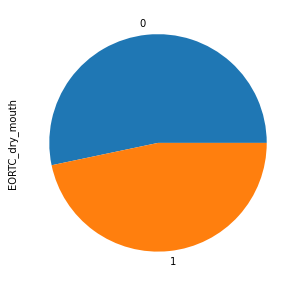

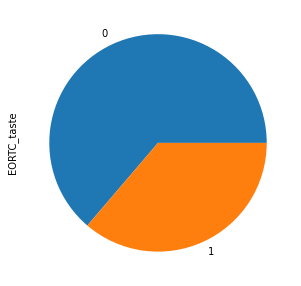

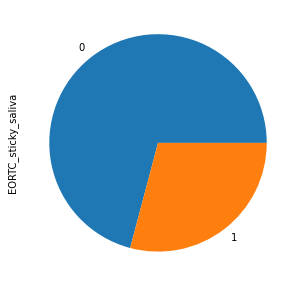

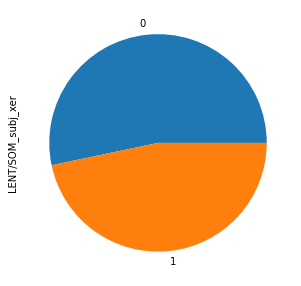

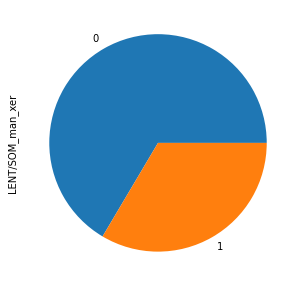

In [3]:
for outcome in outcomes:
    plt.figure(figsize=(5,5))
    df[outcome].value_counts().plot.pie()
    plt.savefig(f'figs/pie_{outcome.replace("/", "_")}.png', dpi=150)

In [6]:
len(df[df['CTCAE_xerostomia'] & df['baseline_CTCAE_xerostomia'] >= 3])

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

"LENT/SOM_subj_xer" vs "EORTC_dry_mouth": 1.0


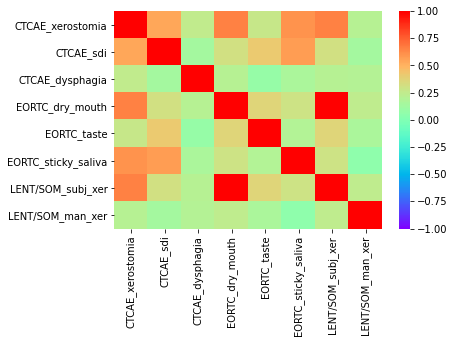

In [4]:
# Check for correlated outcomes
df_outcomes = df[outcomes]
df_corr = df_outcomes.corr()
high_corr = []
for i in range(len(df_corr)):
    for j in range(i):
        corr = df_corr.iloc[i, j]
        if corr > 0.7:
            print('"{}" vs "{}": {}'.format(df_outcomes.columns[i], df_outcomes.columns[j], corr))
            high_corr.append(df_outcomes.columns[i])
            
sns.heatmap(df_corr, cmap='rainbow', vmin=-1, vmax=1);

# Ignore high correlations
for h in high_corr:
    outcomes.remove(h)


"weight_loss_pct" vs "weight_loss": 0.9594100888520335
"SACT" vs "cisplatin": 0.8748647517590632
"baseline_EORTC_dry_mouth" vs "baseline_CTCAE_xerostomia": 0.8936981851917171
"baseline_EORTC_sticky_saliva" vs "baseline_CTCAE_sdi": 1.0
"baseline_EORTC_taste" vs "baseline_CTCAE_sdi": 1.0
"baseline_EORTC_taste" vs "baseline_EORTC_sticky_saliva": 1.0
"baseline_LENT/SOM_subj_xer" vs "baseline_CTCAE_xerostomia": 0.8284674302966829
"baseline_LENT/SOM_subj_xer" vs "baseline_EORTC_dry_mouth": 0.9355082767700794
"mpc_planned" vs "alterio_pc_planned": 0.8755699189378364
"oral_cavity_planned" vs "alterio_pc_planned": 0.8643312881765619
"parotid_contralateral_planned" vs "neck_bi": 0.8008232391914628
"sg_larynx_planned" vs "alterio_pc_planned": 0.8068104164129507
"sg_larynx_planned" vs "mpc_planned": 0.9480042533646572
"smg_contralateral_planned" vs "neck_bi": 0.8331934271168017
"smg_contralateral_planned" vs "parotid_contralateral_planned": 0.8500625464115792
"smg_ipsilateral_planned" vs "alterio_

ValueError: list.remove(x): x not in list

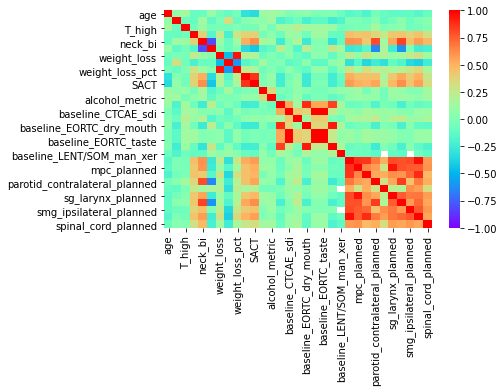

In [5]:
# Print large correlations between features
df_features = df[features]
df_corr = df_features.corr()
high_corr = []
for i in range(len(df_corr)):
    for j in range(i):
        corr = df_corr.iloc[i, j]
        if corr > 0.8:
            print('"{}" vs "{}": {}'.format(df_features.columns[i], df_features.columns[j], corr))
        if corr > 0.9:
            high_corr.append(df_features.columns[i])
            
sns.heatmap(df_corr, cmap='rainbow', vmin=-1, vmax=1);

# Ignore high correlations
for h in high_corr:
    features.remove(h)

In [6]:
# Look at averages of features for each outcome
pd.options.display.max_columns = None
for outcome in outcomes:
    display(df.groupby(outcome)[features].mean())

age      male    T_high    N_high   neck_bi  neck_uni  \
CTCAE_xerostomia                                                                
0                 59.477273  0.886364  0.325758  0.560606  0.598485  0.295455   
1                 58.760000  0.720000  0.360000  0.660000  0.780000  0.160000   

                  weight_loss       mass  cisplatin      SACT  smoking_metric  \
CTCAE_xerostomia                                                                
0                    7.339714  77.279478   0.477273  0.537879      352.349849   
1                   12.932049  72.034123   0.640000  0.720000      362.465325   

                  alcohol_metric  baseline_CTCAE_xerostomia  \
CTCAE_xerostomia                                              
0                     706.970616                   0.567308   
1                     761.437647                   0.630435   

                  baseline_CTCAE_sdi  baseline_CTCAE_dysphagia  \
CTCAE_xerostomia                                                 
0                           0.336538                  0.346154   
1                           0.434783                  0.434783   

                  baseline_EORTC_dry_mouth  baseline_LENT/SOM_subj_xer  \
CTCAE_xerostomia                                                         
0                                 1.432692                    0.403846   
1                                 1.565217                    0.565217   

                  baseline_LENT/SOM_man_xer  alterio_pc_planned  mpc_planned  \
CTCAE_xerostomia                                                               
0                                  0.028846           50.808187    51.072219   
1                                  0.000000           56.957148    57.269540   

                  oral_cavity_planned  parotid_contralateral_planned  \
CTCAE_xerostomia                                                       
0                           47.203502                      22.942336   
1                           51.612013                      28.964814   

                  parotid_ipsilateral_planned  sg_larynx_planned  \
CTCAE_xerostomia                                                   
0                                   39.783922          49.583113   
1                                   41.541247          56.865732   

                  smg_contralateral_planned  smg_ipsilateral_planned  \
CTCAE_xerostomia                                                       
0                                 39.146983                57.321597   
1                                 51.031481                60.372728   

                  spc_planned  spinal_cord_planned  
CTCAE_xerostomia                                    
0                   51.858104            19.833688  
1                   57.587959            19.945853

age      male    T_high    N_high   neck_bi  neck_uni  \
CTCAE_sdi                                                                
0          59.400000  0.876190  0.342857  0.542857  0.533333  0.352381   
1          59.116883  0.792208  0.324675  0.649351  0.805195  0.129870   

           weight_loss       mass  cisplatin      SACT  smoking_metric  \
CTCAE_sdi                                                                
0             7.286057  78.566880   0.438095  0.466667      370.296192   
1            10.802949  72.117856   0.636364  0.753247      336.559229   

           alcohol_metric  baseline_CTCAE_xerostomia  baseline_CTCAE_sdi  \
CTCAE_sdi                                                                  
0              725.645177                   0.571429            0.345238   
1              721.164862                   0.606061            0.393939   

           baseline_CTCAE_dysphagia  baseline_EORTC_dry_mouth  \
CTCAE_sdi                                                       
0                          0.345238                  1.464286   
1                          0.409091                  1.484848   

           baseline_LENT/SOM_subj_xer  baseline_LENT/SOM_man_xer  \
CTCAE_sdi                                                          
0                            0.428571                   0.035714   
1                            0.484848                   0.000000   

           alterio_pc_planned  mpc_planned  oral_cavity_planned  \
CTCAE_sdi                                                         
0                   50.092479    50.057572            46.989396   
1                   55.776983    56.480063            50.358134   

           parotid_contralateral_planned  parotid_ipsilateral_planned  \
CTCAE_sdi                                                               
0                              21.668674                    39.903735   
1                              28.589846                    40.792123   

           sg_larynx_planned  smg_contralateral_planned  \
CTCAE_sdi                                                 
0                  48.720673                  37.630292   
1                  55.543142                  49.021247   

           smg_ipsilateral_planned  spc_planned  spinal_cord_planned  
CTCAE_sdi                                                             
0                        56.997737    51.106251            19.552108  
1                        59.632622    56.604044            20.290246

age      male    T_high    N_high   neck_bi  neck_uni  \
CTCAE_dysphagia                                                                
0                59.288591  0.852349  0.335570  0.563758  0.624161  0.275168   
1                59.242424  0.787879  0.333333  0.696970  0.757576  0.181818   

                 weight_loss       mass  cisplatin      SACT  smoking_metric  \
CTCAE_dysphagia                                                                
0                   8.256530  76.515622   0.483221  0.557047      331.787480   
1                  10.926788  72.780896   0.696970  0.727273      454.189798   

                 alcohol_metric  baseline_CTCAE_xerostomia  \
CTCAE_dysphagia                                              
0                    650.956214                   0.586777   
1                   1027.081858                   0.586207   

                 baseline_CTCAE_sdi  baseline_CTCAE_dysphagia  \
CTCAE_dysphagia                                                 
0                          0.338843                  0.371901   
1                          0.482759                  0.379310   

                 baseline_EORTC_dry_mouth  baseline_LENT/SOM_subj_xer  \
CTCAE_dysphagia                                                         
0                                1.487603                    0.462810   
1                                1.413793                    0.413793   

                 baseline_LENT/SOM_man_xer  alterio_pc_planned  mpc_planned  \
CTCAE_dysphagia                                                               
0                                 0.024793           51.193415    51.560467   
1                                 0.000000           58.385430    58.257584   

                 oral_cavity_planned  parotid_contralateral_planned  \
CTCAE_dysphagia                                                       
0                          47.369661                      23.512712   
1                          53.132832                      29.491968   

                 parotid_ipsilateral_planned  sg_larynx_planned  \
CTCAE_dysphagia                                                   
0                                  39.511986          50.272395   
1                                  43.522231          57.567833   

                 smg_contralateral_planned  smg_ipsilateral_planned  \
CTCAE_dysphagia                                                       
0                                40.537484                57.208422   
1                                51.328897                62.812546   

                 spc_planned  spinal_cord_planned  
CTCAE_dysphagia                                    
0                  52.142227            19.516949  
1                  59.256847            21.459595

age      male    T_high    N_high   neck_bi  neck_uni  \
EORTC_dry_mouth                                                                
0                58.896907  0.917526  0.329897  0.525773  0.556701  0.329897   
1                59.717647  0.752941  0.341176  0.658824  0.752941  0.176471   

                 weight_loss       mass  cisplatin      SACT  smoking_metric  \
EORTC_dry_mouth                                                                
0                   6.911638  79.490691   0.474227  0.546392      398.927069   
1                  11.044526  71.670592   0.576471  0.635294      309.594588   

                 alcohol_metric  baseline_CTCAE_xerostomia  \
EORTC_dry_mouth                                              
0                    741.317740                   0.480519   
1                    705.063148                   0.698630   

                 baseline_CTCAE_sdi  baseline_CTCAE_dysphagia  \
EORTC_dry_mouth                                                 
0                          0.246753                  0.350649   
1                          0.493151                  0.397260   

                 baseline_EORTC_dry_mouth  baseline_LENT/SOM_subj_xer  \
EORTC_dry_mouth                                                         
0                                1.376623                    0.376623   
1                                1.575342                    0.534247   

                 baseline_LENT/SOM_man_xer  alterio_pc_planned  mpc_planned  \
EORTC_dry_mouth                                                               
0                                 0.000000           49.070147    49.113221   
1                                 0.041096           56.408633    56.953263   

                 oral_cavity_planned  parotid_contralateral_planned  \
EORTC_dry_mouth                                                       
0                          45.608084                      22.002072   
1                          51.617398                      27.557977   

                 parotid_ipsilateral_planned  sg_larynx_planned  \
EORTC_dry_mouth                                                   
0                                  39.499625          47.631892   
1                                  41.180117          56.024827   

                 smg_contralateral_planned  smg_ipsilateral_planned  \
EORTC_dry_mouth                                                       
0                                37.308024                56.421999   
1                                48.300864                60.393130   

                 spc_planned  spinal_cord_planned  
EORTC_dry_mouth                                    
0                  50.253611            19.244139  
1                  57.059617            20.510464

age      male    T_high    N_high   neck_bi  neck_uni  \
EORTC_taste                                                                
0            58.706897  0.853448  0.379310  0.525862  0.551724  0.327586   
1            60.287879  0.818182  0.257576  0.696970  0.818182  0.136364   

             weight_loss       mass  cisplatin      SACT  smoking_metric  \
EORTC_taste                                                                
0               6.385151  78.212479   0.456897  0.517241      356.062555   
1              12.911848  71.665905   0.636364  0.712121      354.426948   

             alcohol_metric  baseline_CTCAE_xerostomia  baseline_CTCAE_sdi  \
EORTC_taste                                                                  
0                689.438854                   0.531915            0.234043   
1                781.139705                   0.678571            0.589286   

             baseline_CTCAE_dysphagia  baseline_EORTC_dry_mouth  \
EORTC_taste                                                       
0                            0.276596                  1.436170   
1                            0.535714                  1.535714   

             baseline_LENT/SOM_subj_xer  baseline_LENT/SOM_man_xer  \
EORTC_taste                                                          
0                              0.436170                   0.031915   
1                              0.482143                   0.000000   

             alterio_pc_planned  mpc_planned  oral_cavity_planned  \
EORTC_taste                                                         
0                     50.241198    50.755756            46.800393   
1                     56.463016    56.323367            51.251779   

             parotid_contralateral_planned  parotid_ipsilateral_planned  \
EORTC_taste                                                               
0                                22.328217                    39.735385   
1                                28.584179                    41.209763   

             sg_larynx_planned  smg_contralateral_planned  \
EORTC_taste                                                 
0                    49.479056                  38.713539   
1                    55.367626                  49.210591   

             smg_ipsilateral_planned  spc_planned  spinal_cord_planned  
EORTC_taste                                                             
0                          57.175392    51.031702            19.060690  
1                          59.901355    57.651368            21.195207

age      male    T_high    N_high   neck_bi  \
EORTC_sticky_saliva                                                      
0                    58.767442  0.875969  0.302326  0.565891  0.581395   
1                    60.528302  0.754717  0.415094  0.641509  0.811321   

                     neck_uni  weight_loss       mass  cisplatin      SACT  \
EORTC_sticky_saliva                                                          
0                    0.302326     7.816185  77.758724   0.472868  0.527132   
1                    0.150943    11.188896  71.164564   0.641509  0.735849   

                     smoking_metric  alcohol_metric  \
EORTC_sticky_saliva                                   
0                        358.064606      705.259077   
1                        349.545005      765.307212   

                     baseline_CTCAE_xerostomia  baseline_CTCAE_sdi  \
EORTC_sticky_saliva                                                  
0                                     0.586538            0.375000   
1                                     0.586957            0.347826   

                     baseline_CTCAE_dysphagia  baseline_EORTC_dry_mouth  \
EORTC_sticky_saliva                                                       
0                                    0.307692                  1.451923   
1                                    0.521739                  1.521739   

                     baseline_LENT/SOM_subj_xer  baseline_LENT/SOM_man_xer  \
EORTC_sticky_saliva                                                          
0                                      0.423077                   0.028846   
1                                      0.521739                   0.000000   

                     alterio_pc_planned  mpc_planned  oral_cavity_planned  \
EORTC_sticky_saliva                                                         
0                             51.164062    51.041812            47.455660   
1                             55.742907    56.992757            50.748733   

                     parotid_contralateral_planned  \
EORTC_sticky_saliva                                  
0                                        22.686813   
1                                        29.245851   

                     parotid_ipsilateral_planned  sg_larynx_planned  \
EORTC_sticky_saliva                                                   
0                                      39.932228          49.493458   
1                                      41.126286          56.804595   

                     smg_contralateral_planned  smg_ipsilateral_planned  \
EORTC_sticky_saliva                                                       
0                                    39.252122                57.103585   
1                                    50.317602                60.565484   

                     spc_planned  spinal_cord_planned  
EORTC_sticky_saliva                                    
0                      52.188442            19.979081  
1                      56.459599            19.585400

age      male    T_high    N_high   neck_bi  neck_uni  \
LENT/SOM_man_xer                                                                
0                 59.677686  0.859504  0.380165  0.537190  0.561983  0.314050   
1                 58.491803  0.803279  0.245902  0.688525  0.819672  0.147541   

                  weight_loss       mass  cisplatin      SACT  smoking_metric  \
LENT/SOM_man_xer                                                                
0                    7.571146  78.055879   0.429752  0.495868      364.910253   
1                   11.154434  71.439934   0.704918  0.770492      338.637129   

                  alcohol_metric  baseline_CTCAE_xerostomia  \
LENT/SOM_man_xer                                              
0                     690.648618                   0.625000   
1                     782.385341                   0.518519   

                  baseline_CTCAE_sdi  baseline_CTCAE_dysphagia  \
LENT/SOM_man_xer                                                 
0                           0.406250                  0.416667   
1                           0.296296                  0.296296   

                  baseline_EORTC_dry_mouth  baseline_LENT/SOM_subj_xer  \
LENT/SOM_man_xer                                                         
0                                 1.510417                    0.479167   
1                                 1.407407                    0.407407   

                  baseline_LENT/SOM_man_xer  alterio_pc_planned  mpc_planned  \
LENT/SOM_man_xer                                                               
0                                   0.03125           50.645590    50.692389   
1                                   0.00000           56.170848    56.905423   

                  oral_cavity_planned  parotid_contralateral_planned  \
LENT/SOM_man_xer                                                       
0                           46.830988                      22.842131   
1                           51.555958                      28.077560   

                  parotid_ipsilateral_planned  sg_larynx_planned  \
LENT/SOM_man_xer                                                   
0                                   40.097360          49.723461   
1                                   40.653706          55.280978   

                  smg_contralateral_planned  smg_ipsilateral_planned  \
LENT/SOM_man_xer                                                       
0                                 38.454754                56.360901   
1                                 50.227440                61.373089   

                  spc_planned  spinal_cord_planned  
LENT/SOM_man_xer                                    
0                   51.528943            19.329994  
1                   57.207633            20.900184

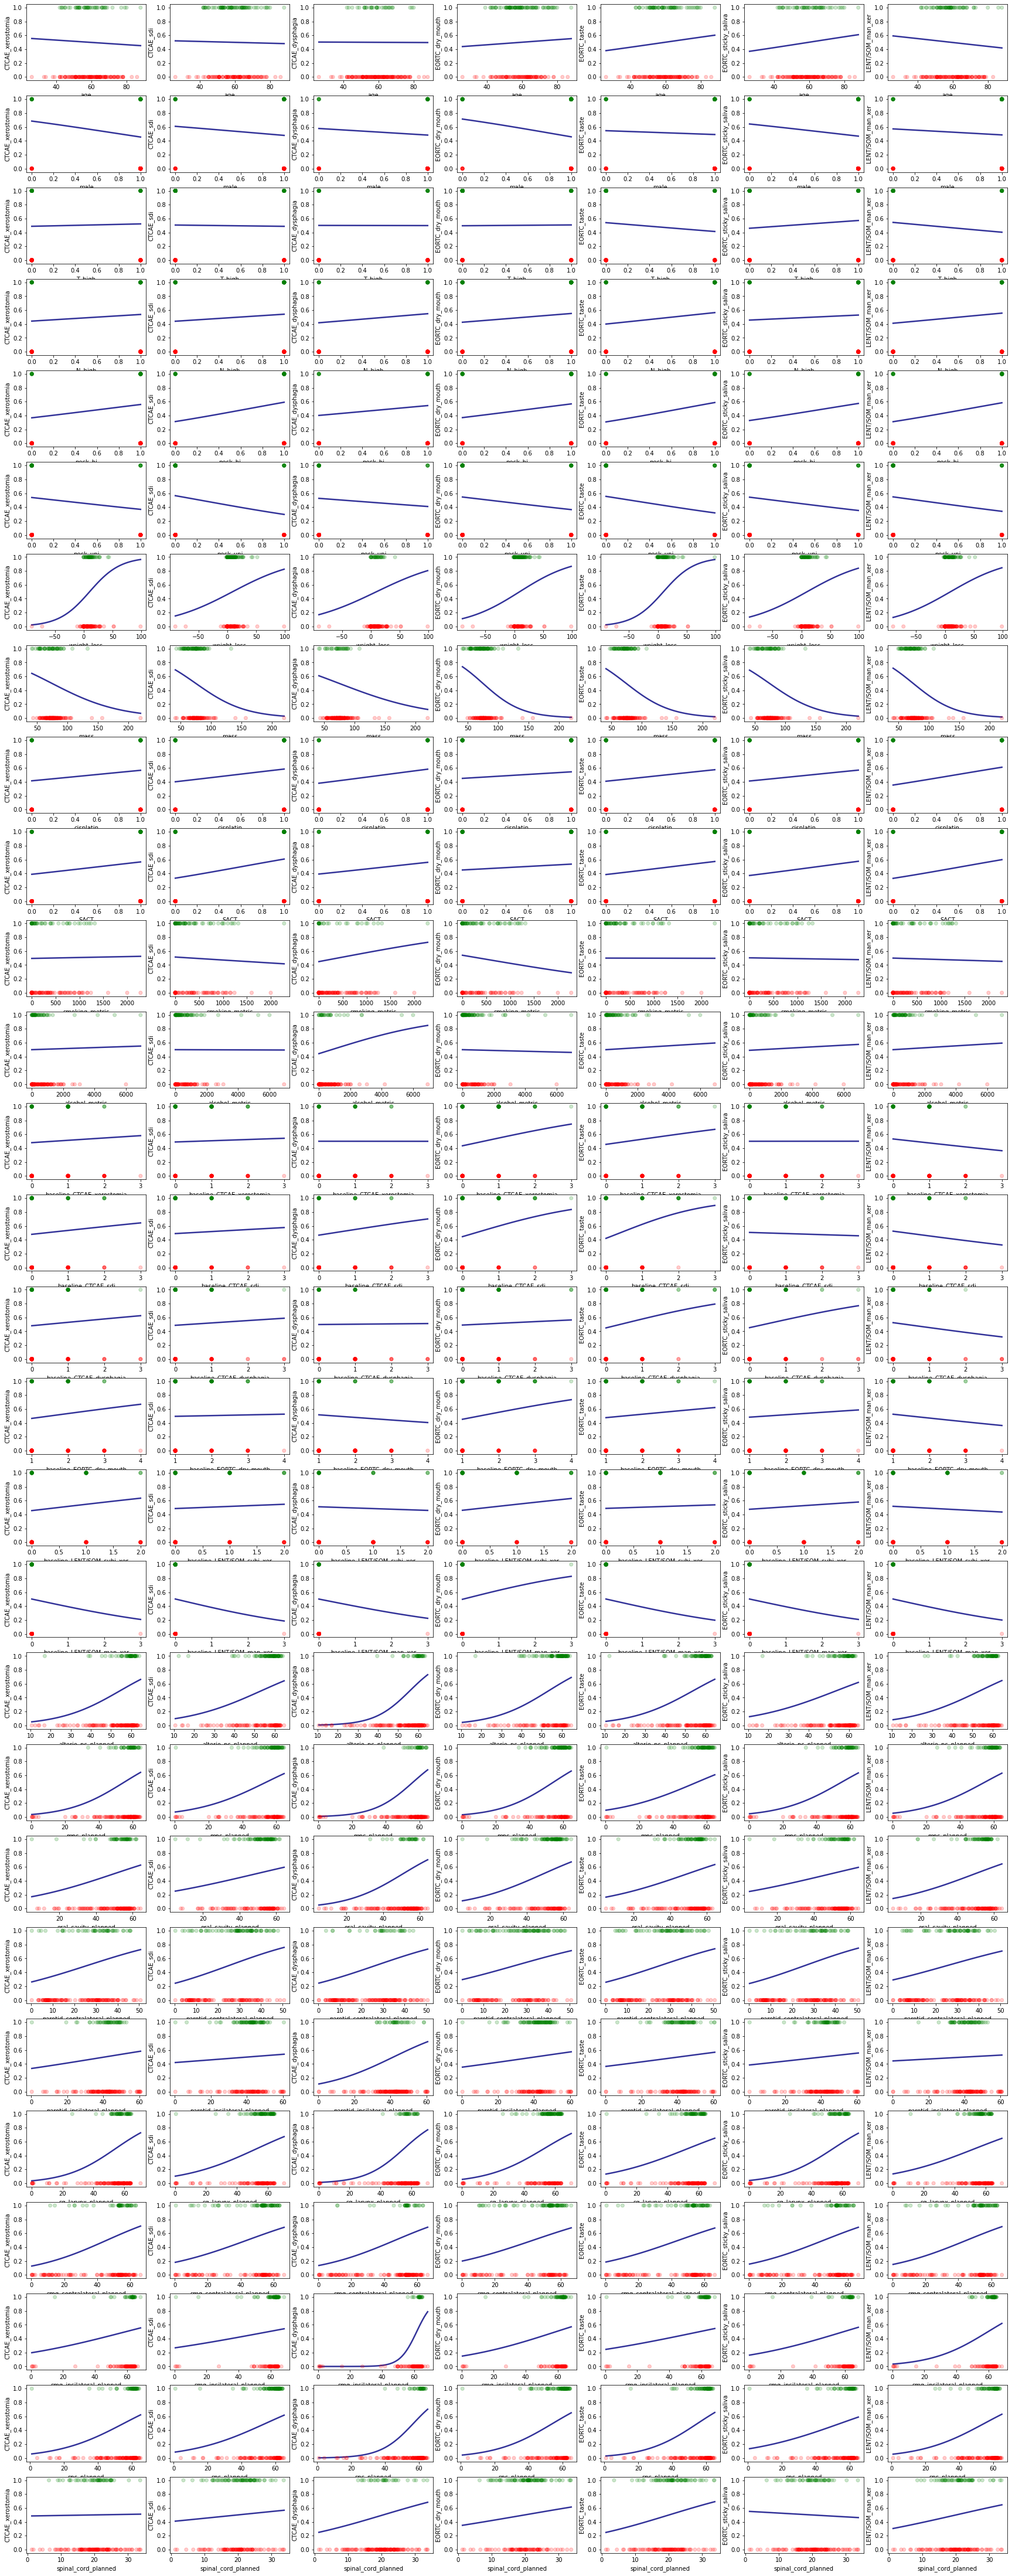

In [7]:
# Univariate logistic regression

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

fig, ax = plt.subplots(len(features), len(outcomes), figsize=(30, 80))
roc = {}

# Perform for each outcome and feature
for i, outcome in enumerate(outcomes):
    roc[outcome] = {}
    for j, f in enumerate(features):
        
        # Fit logistic regression
        df_no_nan = df[[outcome, f]].dropna()
        x = np.array(df_no_nan[f]).reshape(-1, 1)
        y = df_no_nan[outcome]
        model = LogisticRegression(class_weight='balanced')
        scores = cross_val_score(model, x, y, cv=10, scoring='roc_auc')
        roc[outcome][f] = scores.mean()
        model.fit(x, y)
        
        # Plot result
        current_ax = ax[j, i]
        current_ax.scatter(x, y, c=np.array(["r", "g"])[y.astype(int)], zorder=1000, alpha=0.2)
        xx = np.linspace(min(x), max(x), 100)
        yy = model.predict_proba(xx)[:, 1]
        current_ax.plot(xx, yy, c="#000080", lw=2.5, alpha=0.8, zorder=1)
        
        # Add labels
        current_ax.set_ylabel(outcome)
        current_ax.set_xlabel(f)
        
plt.tight_layout      
roc_uni = pd.DataFrame(roc)

In [9]:
# Look at ROC scores for each univariate classification
roc_uni

CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  \
age                                    0.500934   0.387297         0.397123   
male                                   0.583681   0.541315         0.525952   
T_high                                 0.439890   0.393636         0.372976   
N_high                                 0.549780   0.553198         0.568333   
neck_bi                                0.589725   0.638084         0.575595   
neck_uni                               0.566703   0.612955         0.550119   
weight_loss                            0.656667   0.581266         0.596349   
mass                                   0.593187   0.607232         0.492599   
cisplatin                              0.580989   0.601445         0.612738   
SACT                                   0.590769   0.645390         0.592262   
smoking_metric                         0.438091   0.399008         0.554915   
alcohol_metric                         0.471955   0.402282         0.590491   
baseline_CTCAE_xerostomia              0.543318   0.455787         0.386432   
baseline_CTCAE_sdi                     0.528364   0.438757         0.563034   
baseline_CTCAE_dysphagia               0.556227   0.490443         0.391880   
baseline_EORTC_dry_mouth               0.572955   0.450761         0.534829   
baseline_LENT/SOM_subj_xer             0.579955   0.528439         0.437607   
baseline_LENT/SOM_man_xer              0.500000   0.500000         0.500000   
alterio_pc_planned                     0.680769   0.630195         0.696508   
mpc_planned                            0.600549   0.626201         0.654960   
oral_cavity_planned                    0.602527   0.553636         0.584921   
parotid_contralateral_planned          0.634396   0.649188         0.629802   
parotid_ipsilateral_planned            0.567949   0.429444         0.550000   
sg_larynx_planned                      0.609872   0.616656         0.620000   
smg_contralateral_planned              0.669359   0.645990         0.634802   
smg_ipsilateral_planned                0.616667   0.607185         0.640152   
spc_planned                            0.670000   0.622760         0.689484   
spinal_cord_planned                    0.322576   0.526825         0.541026   

                               EORTC_dry_mouth  EORTC_taste  \
age                                   0.441752     0.502588   
male                                  0.579722     0.472511   
T_high                                0.408750     0.563961   
N_high                                0.567778     0.583117   
neck_bi                               0.601944     0.634145   
neck_uni                              0.579444     0.596158   
weight_loss                           0.601290     0.595887   
mass                                  0.619830     0.607909   
cisplatin                             0.554028     0.590584   
SACT                                  0.548472     0.598377   
smoking_metric                        0.548214     0.414037   
alcohol_metric                        0.543750     0.475037   
baseline_CTCAE_xerostomia             0.582143     0.558963   
baseline_CTCAE_sdi                    0.591964     0.606185   
baseline_CTCAE_dysphagia              0.517857     0.562778   
baseline_EORTC_dry_mouth              0.573214     0.535926   
baseline_LENT/SOM_subj_xer            0.563393     0.524815   
baseline_LENT/SOM_man_xer             0.500000     0.500000   
alterio_pc_planned                    0.681728     0.635660   
mpc_planned                           0.632330     0.608874   
oral_cavity_planned                   0.648812     0.561201   
parotid_contralateral_planned         0.621605     0.627868   
parotid_ipsilateral_planned           0.566667     0.532511   
sg_larynx_planned                     0.617099     0.621032   
smg_contralateral_planned             0.638133     0.613348   
smg_ipsilateral_planned               0.597236     0.521528   
spc_planned                           

In [10]:
# Find best features for each outcome

threshold = 0.6
corr_threshold = 0.8
best_features = {}

for outcome in outcomes:
    
    # Get best ROC AUCs
    best = roc_uni[outcome].sort_values(ascending=False)
    best = best[best > threshold]
    display(best)
    #display(rocs)
    
    # Check for large correlations and remove
    corr = df[best.index].corr()
    #display(corr)
    to_drop = []
    for i in range(len(corr)):
        for j in range(i):
            corr_ij = corr.iloc[i, j]
            if corr_ij > corr_threshold:
                print(best.index[i], best.index[j])
                to_drop.append(best.index[i])
    best.drop(to_drop, inplace=True)
    display(to_drop)
    
    # Show results
    best_features[outcome] = best.index
    display(best)

alterio_pc_planned               0.680769
spc_planned                      0.670000
smg_contralateral_planned        0.669359
weight_loss                      0.656667
parotid_contralateral_planned    0.634396
smg_ipsilateral_planned          0.616667
sg_larynx_planned                0.609872
oral_cavity_planned              0.602527
mpc_planned                      0.600549
Name: CTCAE_xerostomia, dtype: float64

spc_planned alterio_pc_planned
parotid_contralateral_planned smg_contralateral_planned
smg_ipsilateral_planned alterio_pc_planned
sg_larynx_planned alterio_pc_planned
oral_cavity_planned alterio_pc_planned
oral_cavity_planned spc_planned
mpc_planned alterio_pc_planned
mpc_planned sg_larynx_planned


['spc_planned',
 'parotid_contralateral_planned',
 'smg_ipsilateral_planned',
 'sg_larynx_planned',
 'oral_cavity_planned',
 'oral_cavity_planned',
 'mpc_planned',
 'mpc_planned']

alterio_pc_planned           0.680769
smg_contralateral_planned    0.669359
weight_loss                  0.656667
Name: CTCAE_xerostomia, dtype: float64

parotid_contralateral_planned    0.649188
smg_contralateral_planned        0.645990
SACT                             0.645390
neck_bi                          0.638084
alterio_pc_planned               0.630195
mpc_planned                      0.626201
spc_planned                      0.622760
sg_larynx_planned                0.616656
neck_uni                         0.612955
mass                             0.607232
smg_ipsilateral_planned          0.607185
cisplatin                        0.601445
Name: CTCAE_sdi, dtype: float64

smg_contralateral_planned parotid_contralateral_planned
neck_bi parotid_contralateral_planned
neck_bi smg_contralateral_planned
mpc_planned alterio_pc_planned
spc_planned alterio_pc_planned
sg_larynx_planned alterio_pc_planned
sg_larynx_planned mpc_planned
smg_ipsilateral_planned alterio_pc_planned
cisplatin SACT


['smg_contralateral_planned',
 'neck_bi',
 'neck_bi',
 'mpc_planned',
 'spc_planned',
 'sg_larynx_planned',
 'sg_larynx_planned',
 'smg_ipsilateral_planned',
 'cisplatin']

parotid_contralateral_planned    0.649188
SACT                             0.645390
alterio_pc_planned               0.630195
neck_uni                         0.612955
mass                             0.607232
Name: CTCAE_sdi, dtype: float64

alterio_pc_planned               0.696508
spc_planned                      0.689484
mpc_planned                      0.654960
smg_ipsilateral_planned          0.640152
smg_contralateral_planned        0.634802
parotid_contralateral_planned    0.629802
sg_larynx_planned                0.620000
cisplatin                        0.612738
Name: CTCAE_dysphagia, dtype: float64

spc_planned alterio_pc_planned
mpc_planned alterio_pc_planned
smg_ipsilateral_planned alterio_pc_planned
parotid_contralateral_planned smg_contralateral_planned
sg_larynx_planned alterio_pc_planned
sg_larynx_planned mpc_planned


['spc_planned',
 'mpc_planned',
 'smg_ipsilateral_planned',
 'parotid_contralateral_planned',
 'sg_larynx_planned',
 'sg_larynx_planned']

alterio_pc_planned           0.696508
smg_contralateral_planned    0.634802
cisplatin                    0.612738
Name: CTCAE_dysphagia, dtype: float64

alterio_pc_planned               0.681728
spc_planned                      0.672423
oral_cavity_planned              0.648812
smg_contralateral_planned        0.638133
mpc_planned                      0.632330
parotid_contralateral_planned    0.621605
mass                             0.619830
sg_larynx_planned                0.617099
neck_bi                          0.601944
weight_loss                      0.601290
Name: EORTC_dry_mouth, dtype: float64

spc_planned alterio_pc_planned
oral_cavity_planned alterio_pc_planned
oral_cavity_planned spc_planned
mpc_planned alterio_pc_planned
parotid_contralateral_planned smg_contralateral_planned
sg_larynx_planned alterio_pc_planned
sg_larynx_planned mpc_planned
neck_bi smg_contralateral_planned
neck_bi parotid_contralateral_planned


['spc_planned',
 'oral_cavity_planned',
 'oral_cavity_planned',
 'mpc_planned',
 'parotid_contralateral_planned',
 'sg_larynx_planned',
 'sg_larynx_planned',
 'neck_bi',
 'neck_bi']

alterio_pc_planned           0.681728
smg_contralateral_planned    0.638133
mass                         0.619830
weight_loss                  0.601290
Name: EORTC_dry_mouth, dtype: float64

spc_planned                      0.650866
alterio_pc_planned               0.635660
neck_bi                          0.634145
parotid_contralateral_planned    0.627868
sg_larynx_planned                0.621032
smg_contralateral_planned        0.613348
mpc_planned                      0.608874
mass                             0.607909
baseline_CTCAE_sdi               0.606185
Name: EORTC_taste, dtype: float64

alterio_pc_planned spc_planned
parotid_contralateral_planned neck_bi
sg_larynx_planned alterio_pc_planned
smg_contralateral_planned neck_bi
smg_contralateral_planned parotid_contralateral_planned
mpc_planned alterio_pc_planned
mpc_planned sg_larynx_planned


['alterio_pc_planned',
 'parotid_contralateral_planned',
 'sg_larynx_planned',
 'smg_contralateral_planned',
 'smg_contralateral_planned',
 'mpc_planned',
 'mpc_planned']

spc_planned           0.650866
neck_bi               0.634145
mass                  0.607909
baseline_CTCAE_sdi    0.606185
Name: EORTC_taste, dtype: float64

parotid_contralateral_planned    0.644893
smg_contralateral_planned        0.644573
sg_larynx_planned                0.636090
neck_bi                          0.615641
mass                             0.611368
smg_ipsilateral_planned          0.606667
spc_planned                      0.604744
SACT                             0.602564
mpc_planned                      0.600684
Name: EORTC_sticky_saliva, dtype: float64

smg_contralateral_planned parotid_contralateral_planned
neck_bi parotid_contralateral_planned
neck_bi smg_contralateral_planned
mpc_planned sg_larynx_planned


['smg_contralateral_planned', 'neck_bi', 'neck_bi', 'mpc_planned']

parotid_contralateral_planned    0.644893
sg_larynx_planned                0.636090
mass                             0.611368
smg_ipsilateral_planned          0.606667
spc_planned                      0.604744
SACT                             0.602564
Name: EORTC_sticky_saliva, dtype: float64

smg_contralateral_planned        0.654563
SACT                             0.640659
cisplatin                        0.640339
neck_bi                          0.630815
mpc_planned                      0.624817
spc_planned                      0.611172
mass                             0.604724
parotid_contralateral_planned    0.604243
weight_loss                      0.602260
alterio_pc_planned               0.601160
Name: LENT/SOM_man_xer, dtype: float64

cisplatin SACT
neck_bi smg_contralateral_planned
parotid_contralateral_planned smg_contralateral_planned
parotid_contralateral_planned neck_bi
alterio_pc_planned mpc_planned
alterio_pc_planned spc_planned


['cisplatin',
 'neck_bi',
 'parotid_contralateral_planned',
 'parotid_contralateral_planned',
 'alterio_pc_planned',
 'alterio_pc_planned']

smg_contralateral_planned    0.654563
SACT                         0.640659
mpc_planned                  0.624817
spc_planned                  0.611172
mass                         0.604724
weight_loss                  0.602260
Name: LENT/SOM_man_xer, dtype: float64


Training for CTCAE_xerostomia with 169 patients
Logistic regression: ROC AUC = 0.6741346153846155
Model intercept = -2.258146842114373


Feature  Coefficient
1  smg_contralateral_planned     1.269598
0         alterio_pc_planned     1.269267
2                weight_loss     0.694058


KNN: best n_neighbours = 25
ROC AUC = 0.7189423076923077

SVM: ROC AUC = 0.6914743589743589

Random forest: ROC AUC = 0.7500320512820513
max_depth: 3
max_features: 1
min_samples_split: 10

Training for CTCAE_sdi with 182 patients
Logistic regression: ROC AUC = 0.7043181818181818
Model intercept = -0.6832765489826501


Feature  Coefficient
1                           SACT     0.703766
2             alterio_pc_planned     0.575410
0  parotid_contralateral_planned     0.291512
3                       neck_uni    -0.706371
4                           mass    -0.983106


KNN: best n_neighbours = 27
ROC AUC = 0.7230275974025975

SVM: ROC AUC = 0.6988474025974026

Random forest: ROC AUC = 0.7207467532467533
max_depth: 2
max_features: 1
min_samples_split: 2

Training for CTCAE_dysphagia with 179 patients
Logistic regression: ROC AUC = 0.6817063492063493
Model intercept = -2.3772563094088426


Feature  Coefficient
0         alterio_pc_planned     1.748989
1  smg_contralateral_planned     0.941799
2                  cisplatin     0.439445


KNN: best n_neighbours = 3
ROC AUC = 0.6699206349206348

SVM: ROC AUC = 0.6819444444444445

Random forest: ROC AUC = 0.7229761904761905
max_depth: 4
max_features: 3
min_samples_split: 2

Training for EORTC_dry_mouth with 169 patients
Logistic regression: ROC AUC = 0.6709126984126984
Model intercept = -1.707650145659177


Feature  Coefficient
0         alterio_pc_planned     1.551152
1  smg_contralateral_planned     0.721905
3                weight_loss     0.390926
2                       mass    -0.967871


KNN: best n_neighbours = 49
ROC AUC = 0.6488095238095238

SVM: ROC AUC = 0.6700396825396825

Random forest: ROC AUC = 0.7130952380952381
max_depth: 2
max_features: 3
min_samples_split: 2

Training for EORTC_taste with 150 patients
Logistic regression: ROC AUC = 0.6921481481481481
Model intercept = -1.7336971697021457


Feature  Coefficient
3  baseline_CTCAE_sdi     1.522986
0         spc_planned     1.330375
1             neck_bi     0.738071
2                mass    -0.496241


KNN: best n_neighbours = 23
ROC AUC = 0.6918888888888889

SVM: ROC AUC = 0.6745185185185185

Random forest: ROC AUC = 0.6731851851851852
max_depth: 2
max_features: 3
min_samples_split: 10

Training for EORTC_sticky_saliva with 135 patients
Logistic regression: ROC AUC = 0.6599999999999999
Model intercept = -1.4833448000177583


Feature  Coefficient
0  parotid_contralateral_planned     1.049781
1              sg_larynx_planned     0.961765
5                           SACT     0.636309
4                    spc_planned    -0.010899
3        smg_ipsilateral_planned    -0.187522
2                           mass    -0.557674


KNN: best n_neighbours = 39
ROC AUC = 0.6513888888888888

SVM: ROC AUC = 0.6363888888888889

Random forest: ROC AUC = 0.678611111111111
max_depth: 2
max_features: 3
min_samples_split: 2

Training for LENT/SOM_man_xer with 169 patients
Logistic regression: ROC AUC = 0.665
Model intercept = -1.566223576617232


Feature  Coefficient
0  smg_contralateral_planned     0.893349
1                       SACT     0.718343
2                mpc_planned     0.384667
3                spc_planned     0.348162
5                weight_loss     0.206629
4                       mass    -1.128958


KNN: best n_neighbours = 23
ROC AUC = 0.6786363636363637

SVM: ROC AUC = 0.6795454545454545

Random forest: ROC AUC = 0.7040909090909091
max_depth: 3
max_features: 1
min_samples_split: 3


Text(0, 0.5, 'ROC AUC')

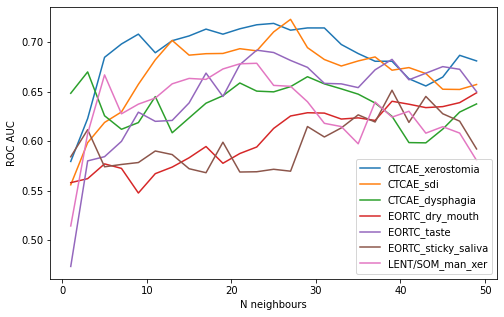

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA

# Perform multivariate analyses with best features

rocs = {}
rocs_std = {}
best_params = {}
plt.figure(figsize=(8, 5))

for outcome in outcomes:
    
    rocs[outcome] = {}
    rocs_std[outcome] = {}
    best_params[outcome] = {}
    
    # Get training data
    f_to_use = list(best_features[outcome])
    df_no_nan = df[f_to_use + [outcome]].dropna()
    print(f'\nTraining for {outcome} with {len(df_no_nan)} patients')
    X = df_no_nan.drop(outcome, axis=1)
    y = df_no_nan[outcome]
    
    # Rescale X so all features are in range 0-1
    min_max_scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
    
    # Fit logistic regression
    model = LogisticRegression(max_iter=500, class_weight='balanced')
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='roc_auc')
    rocs[outcome]['logistic_regression'] = scores.mean()
    rocs_std[outcome]['logistic_regression'] = scores.std()
    model.fit(X_scaled, y)
    
    # Print info
    print('Logistic regression: ROC AUC =', scores.mean())
    print('Model intercept =', model.intercept_[0])
    input_features = X.columns
    coefs = pd.DataFrame(
        data=list(zip(X.columns, model.coef_[0])),
        columns=['Feature', 'Coefficient'])
    coefs.sort_values('Coefficient', ascending=False, inplace=True)
    display(coefs)
    
    # Find best N for KNN
    n_neighb = np.arange(1, 50, 2)
    parameters = {'n_neighbors': n_neighb}
    gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, scoring='roc_auc')
    gridCV.fit(X_scaled, y)
    print('\nKNN: best n_neighbours =', gridCV.best_params_['n_neighbors'])
    print('ROC AUC =', gridCV.best_score_)
    rocs[outcome]['KNN'] = gridCV.best_score_
    rocs_std[outcome]['KNN'] = gridCV.cv_results_['std_test_score'][gridCV.best_index_]
    best_params[outcome]['KNN'] = gridCV.best_params_
    
    # Plot N vs score for KNN
    scores = gridCV.cv_results_['mean_test_score']
    plt.plot(n_neighb, scores, label=outcome)
    
    # Try SVM
    svc = svm.SVC(class_weight='balanced')
    scores = cross_val_score(svc, X_scaled, y, cv=10, scoring='roc_auc')
    rocs[outcome]['SVM'] = scores.mean()
    rocs_std[outcome]['SVM'] = scores.std()
    print('\nSVM: ROC AUC =', scores.mean())
    
    # Try random forest with top features
    param_grid = {
        "max_depth": [2, 3, 4],
        "max_features": [1, 3, 10],
        "min_samples_split": [2, 3, 10]}
    gridCV = GridSearchCV(RandomForestClassifier(n_estimators=75, class_weight='balanced'), cv=10,
                          param_grid=param_grid, n_jobs=-1, scoring='roc_auc')
    gridCV.fit(X, y)
    
    # Print info
    print('\nRandom forest: ROC AUC =', gridCV.best_score_)
    print('max_depth:', gridCV.best_params_['max_depth'])
    print('max_features:', gridCV.best_params_['max_features'])
    print('min_samples_split:', gridCV.best_params_['min_samples_split'])
    rocs[outcome]['random_forest'] = gridCV.best_score_
    rocs_std[outcome]['random_forest'] = gridCV.cv_results_['std_test_score'][gridCV.best_index_]
    best_params[outcome]['random_forest'] = gridCV.best_params_
    
    # Try random forest using all features
    df_no_nan = df[features + [outcome]].dropna()
    X_all = df_no_nan[features]
    y_all = df_no_nan[outcome]
    gridCV.fit(X_all, y_all)
    rocs[outcome]['random_forest_all'] = gridCV.best_score_
    rocs_std[outcome]['random_forest_all'] = gridCV.cv_results_['std_test_score'][gridCV.best_index_]
    best_params[outcome]['random_forest_all'] = gridCV.best_params_
    
    # Try random forest, all features, NaN set to 0
    X_all_nan_zero = df.fillna(0)[features]
    y_all_nan_zero = df.fillna(0)[outcome]
    gridCV.fit(X_all_nan_zero, y_all_nan_zero)
    rocs[outcome]['random_forest_all_nan_zero'] = gridCV.best_score_
    rocs_std[outcome]['random_forest_all_nan_zero'] = gridCV.cv_results_['std_test_score'][gridCV.best_index_]
    best_params[outcome]['random_forest_all_nan_zero'] = gridCV.best_params_
    
    # Try random forest with PCA
    pca = PCA()
    X_all_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_all), columns=X_all.columns)
    pca.fit(X_all_scaled)
    X_pca = pca.transform(X_all_scaled)
    gridCV.fit(X_pca, y_all)
    rocs[outcome]['random_forest_PCA'] = gridCV.best_score_
    rocs_std[outcome]['random_forest_PCA'] = gridCV.cv_results_['std_test_score'][gridCV.best_index_]
    best_params[outcome]['random_forest_PCA'] = gridCV.best_params_

plt.legend(loc='lower right')
plt.xlabel('N neighbours')
plt.ylabel('ROC AUC')

In [50]:
# Show ROC AUCs from different models
df_rocs = pd.DataFrame(rocs)
display(df_rocs)
df_std_rocs = pd.DataFrame(rocs_std)
display(df_std_rocs)

def get_data(df, f_to_use, outcome):
    df_no_nan = df[list(f_to_use) + [outcome]].dropna()
    X = df_no_nan.drop(outcome, axis=1)
    y = df_no_nan[outcome]
    return X, y


CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  \
logistic_regression                 0.674135   0.704318         0.681706   
KNN                                 0.718942   0.723028         0.669921   
SVM                                 0.691474   0.698847         0.681944   
random_forest                       0.750032   0.720747         0.722976   
random_forest_all                   0.669841   0.685000         0.582143   
random_forest_all_nan_zero          0.723956   0.675455         0.664563   
random_forest_PCA                   0.534921   0.595833         0.619643   

                            EORTC_dry_mouth  EORTC_taste  EORTC_sticky_saliva  \
logistic_regression                0.670913     0.692148             0.660000   
KNN                                0.648810     0.691889             0.651389   
SVM                                0.670040     0.674519             0.636389   
random_forest                      0.713095     0.673185             0.678611   
random_forest_all                  0.565000     0.684722             0.629365   
random_forest_all_nan_zero         0.700417     0.682522             0.656795   
random_forest_PCA                  0.595000     0.590833             0.531746   

                            LENT/SOM_man_xer  
logistic_regression                 0.665000  
KNN                                 0.678636  
SVM                                 0.679545  
random_forest                       0.704091  
random_forest_all                   0.692778  
random_forest_all_nan_zero          0.705876  
random_forest_PCA                   0.656111

CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  \
logistic_regression                 0.164748   0.096421         0.134261   
KNN                                 0.174610   0.093472         0.113080   
SVM                                 0.157868   0.055707         0.130380   
random_forest                       0.134815   0.066895         0.153253   
random_forest_all                   0.177827   0.195000         0.270133   
random_forest_all_nan_zero          0.134454   0.079586         0.117024   
random_forest_PCA                   0.211868   0.224328         0.188991   

                            EORTC_dry_mouth  EORTC_taste  EORTC_sticky_saliva  \
logistic_regression                0.089086     0.185217             0.136932   
KNN                                0.145208     0.139702             0.155441   
SVM                                0.136054     0.156641             0.154707   
random_forest                      0.115067     0.152018             0.174775   
random_forest_all                  0.248042     0.187681             0.215781   
random_forest_all_nan_zero         0.108005     0.134035             0.090397   
random_forest_PCA                  0.110567     0.162513             0.130603   

                            LENT/SOM_man_xer  
logistic_regression                 0.166140  
KNN                                 0.141985  
SVM                                 0.137058  
random_forest                       0.122830  
random_forest_all                   0.122400  
random_forest_all_nan_zero          0.176502  
random_forest_PCA                   0.225085

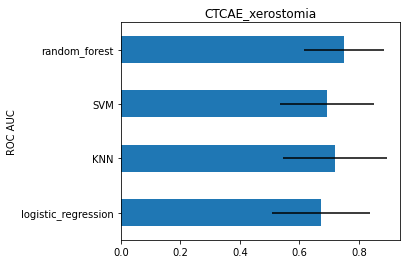

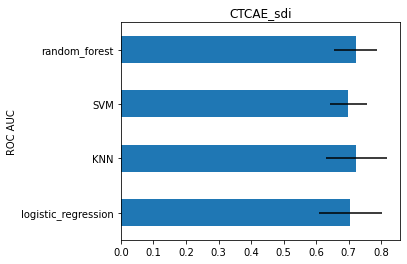

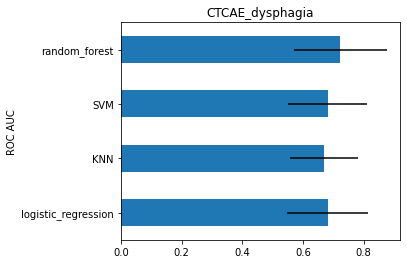

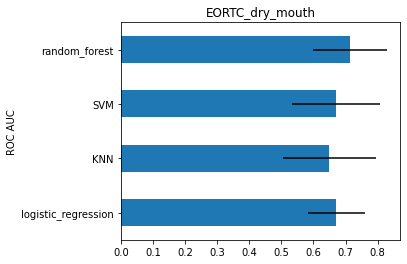

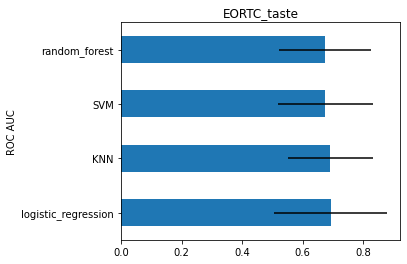

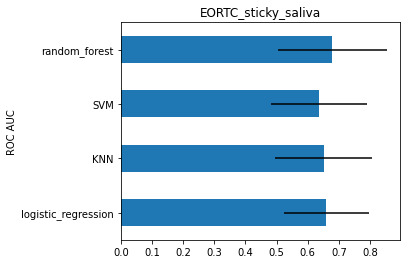

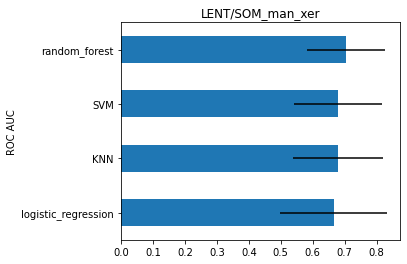

In [17]:
to_plot = ['logistic_regression', 'KNN', 'SVM', 'random_forest']#, 'BDT']
for outcome in outcomes:
    plt.figure(figsize=(5,4))
    df_rocs.loc[to_plot][outcome].plot(kind='barh', xerr=df_std_rocs[outcome])
    plt.title(outcome)
    plt.ylabel('ROC AUC')

In [27]:
# Try random forest with principal component analysis

from sklearn.decomposition import PCA

rocs_with_pca = {}
best_params_pca = {}
for outcome in outcomes:
    
    rocs_with_pca[outcome] = {}
    best_params_pca[outcome] = {}
    
    # Get training data
    df_no_nan = df.dropna()
    X = df_no_nan[features]
    y = df_no_nan[outcome]
     
    # Rescale X so all features are in range 0-1
    min_max_scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
    
    # Try different numbers of components
    for n_comp in range(1, 11):
    
        # PCA on X
        pca = PCA(n_components=n_comp)
        pca.fit(X_scaled)
        X_pca = pca.transform(X_scaled)
        
        # Search parameter space
        param_grid = {
            "max_depth": [2, 3, 4],
            "max_features": [1, 3, 10],
            "min_samples_split": [2, 3, 10]}
        gridCV = GridSearchCV(RandomForestClassifier(n_estimators=75), cv=10,
                              param_grid=param_grid, n_jobs=-1, scoring='roc_auc')
        gridCV.fit(X_pca, y)
        rocs_with_pca[outcome][n_comp] = gridCV.best_score_
        best_params_pca[outcome][n_comp] = gridCV.best_params_

In [28]:
df_pca = pd.DataFrame(rocs_with_pca)
df_pca

CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  EORTC_dry_mouth  \
1           0.469444   0.585000         0.652679         0.637500   
2           0.535317   0.597500         0.528571         0.617500   
3           0.515476   0.606667         0.592857         0.644167   
4           0.515873   0.595000         0.544643         0.632500   
5           0.508730   0.595000         0.466071         0.615833   
6           0.541270   0.575833         0.553571         0.627500   
7           0.500794   0.564167         0.510714         0.550833   
8           0.516667   0.552500         0.490179         0.520000   
9           0.566667   0.561667         0.453571         0.469167   
10          0.553175   0.567500         0.488393         0.510833   

    EORTC_taste  EORTC_sticky_saliva  LENT/SOM_man_xer  
1      0.693750             0.351190          0.611111  
2      0.652500             0.564286          0.641111  
3      0.656111             0.575794          0.656944  
4      0.634722             0.518651          0.661389  
5      0.658333             0.553968          0.621944  
6      0.631944             0.525397          0.672500  
7      0.655556             0.497619          0.655556  
8      0.634722             0.486508          0.654722  
9      0.651944             0.467460          0.688056  
10     0.630556             0.491270          0.658611

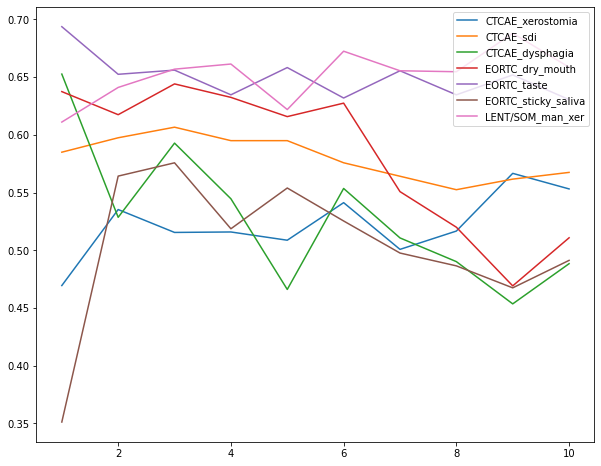

In [187]:
plt.figure(figsize=(10,8))
for outcome in outcomes:
    plt.plot(df_pca.index, df_pca[outcome].values, label=outcome)
plt.legend(loc='upper right');
plt.savefig('figs/pca.png')


 Best features for CTCAE_xerostomia:
                             importance
parotid_ipsilateral_planned    0.096263
alterio_pc_planned             0.067730
spinal_cord_planned            0.067307
mass                           0.065386
male                           0.060463
smg_contralateral_planned      0.055469
alcohol_metric                 0.055265
smoking_metric                 0.050019


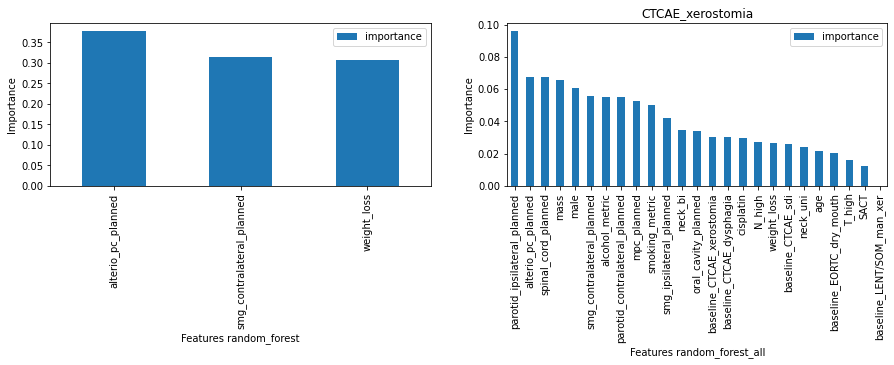


 Best features for CTCAE_sdi:
                             importance
alterio_pc_planned             0.104009
spinal_cord_planned            0.083377
mass                           0.071685
smg_contralateral_planned      0.070060
parotid_ipsilateral_planned    0.055730
smoking_metric                 0.049258
baseline_CTCAE_sdi             0.043795
age                            0.042740


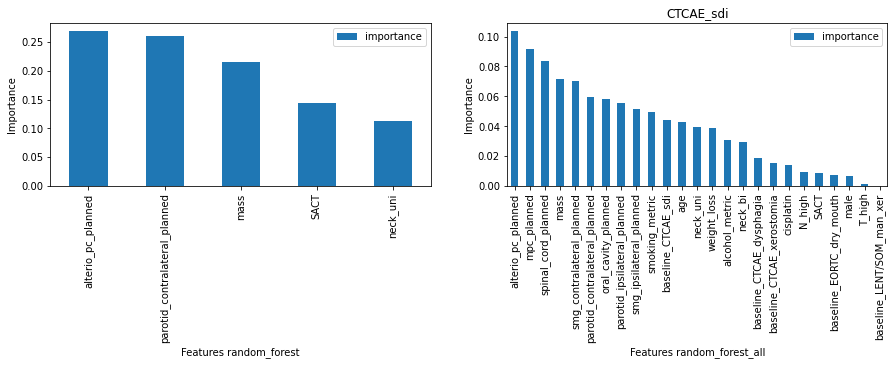


 Best features for CTCAE_dysphagia:
                             importance
mpc_planned                    0.077206
smg_contralateral_planned      0.074013
weight_loss                    0.071479
smg_ipsilateral_planned        0.066908
smoking_metric                 0.064356
baseline_CTCAE_dysphagia       0.060647
baseline_EORTC_dry_mouth       0.058332
mass                           0.044125
parotid_ipsilateral_planned    0.043028
age                            0.041333


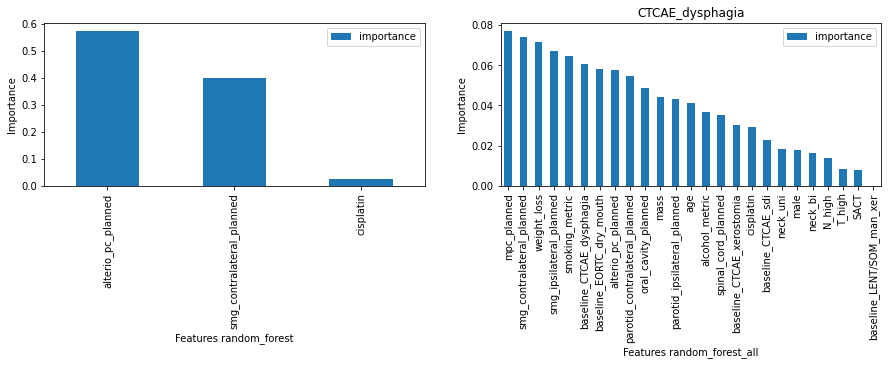


 Best features for EORTC_dry_mouth:
                               importance
parotid_contralateral_planned    0.100133
alterio_pc_planned               0.077227
mass                             0.074353
spinal_cord_planned              0.068279
alcohol_metric                   0.057486
age                              0.050212
smoking_metric                   0.047760
male                             0.041793


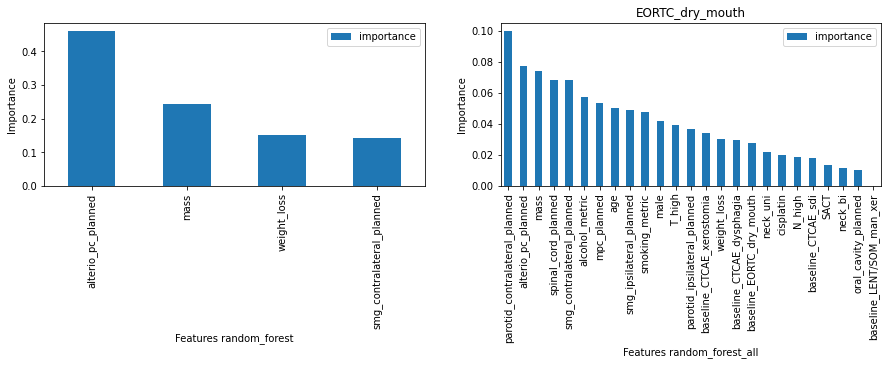


 Best features for EORTC_taste:
                               importance
parotid_contralateral_planned    0.102771
weight_loss                      0.083905
spinal_cord_planned              0.075086
mpc_planned                      0.071364
mass                             0.060466
oral_cavity_planned              0.055282
age                              0.054078
parotid_ipsilateral_planned      0.052255
baseline_CTCAE_xerostomia        0.048633
smoking_metric                   0.042187


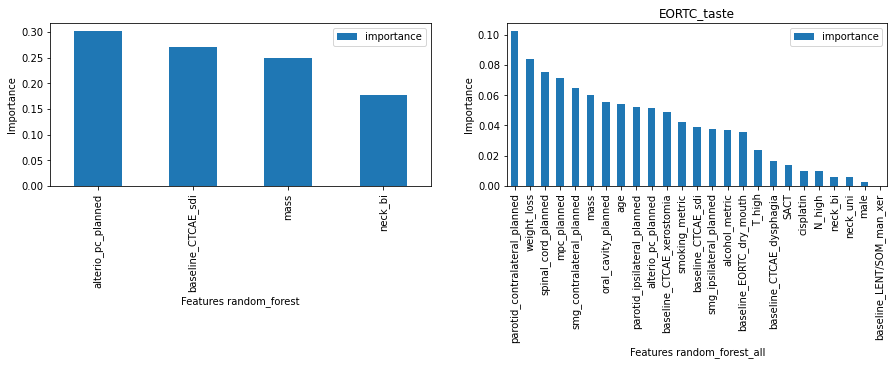


 Best features for EORTC_sticky_saliva:
                             importance
smg_ipsilateral_planned        0.093062
spinal_cord_planned            0.080746
parotid_ipsilateral_planned    0.070882
weight_loss                    0.070754
smg_contralateral_planned      0.057283
mass                           0.052238
smoking_metric                 0.042926


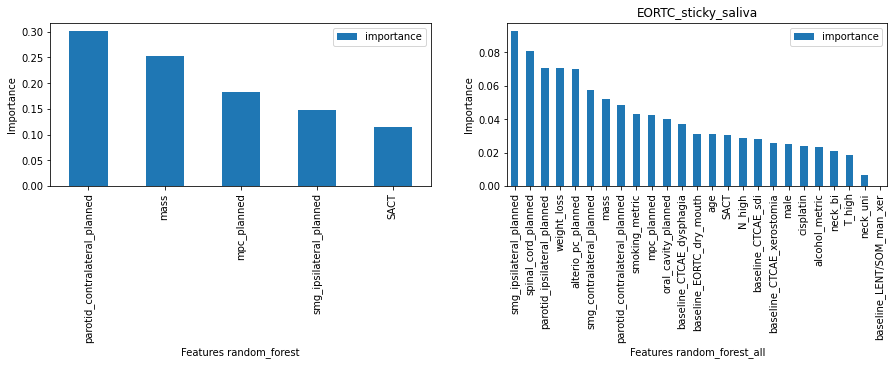


 Best features for LENT/SOM_man_xer:
                               importance
oral_cavity_planned              0.085379
cisplatin                        0.081380
parotid_contralateral_planned    0.076760
smoking_metric                   0.069433
smg_ipsilateral_planned          0.067389
spinal_cord_planned              0.058525
weight_loss                      0.045806
parotid_ipsilateral_planned      0.045344


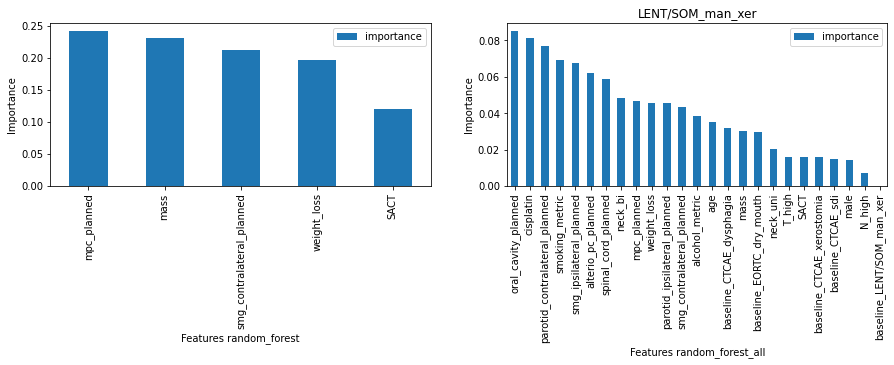

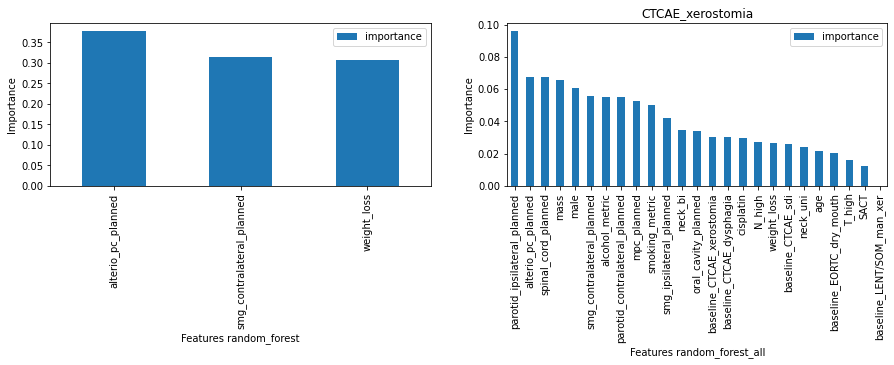

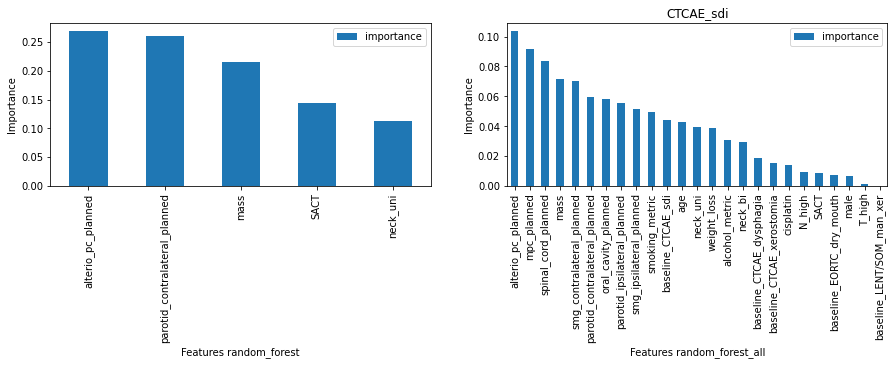

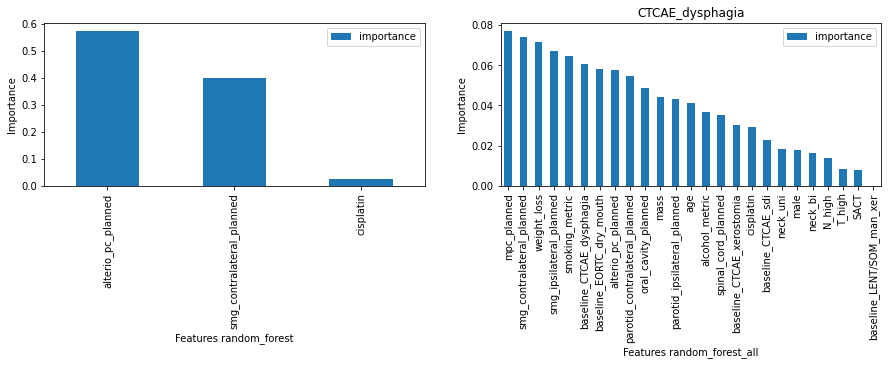

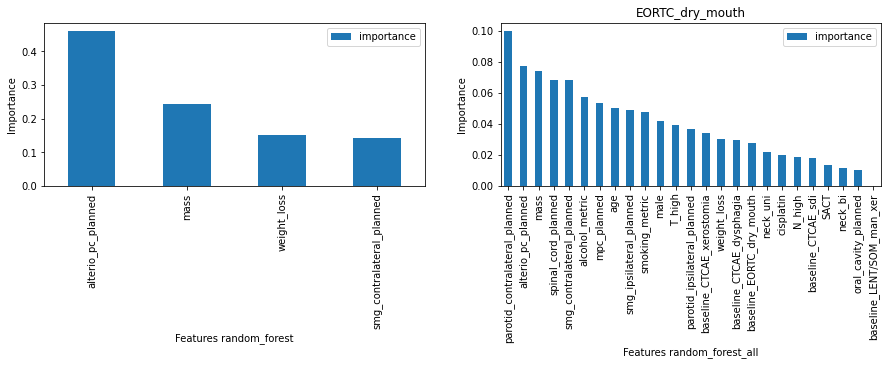

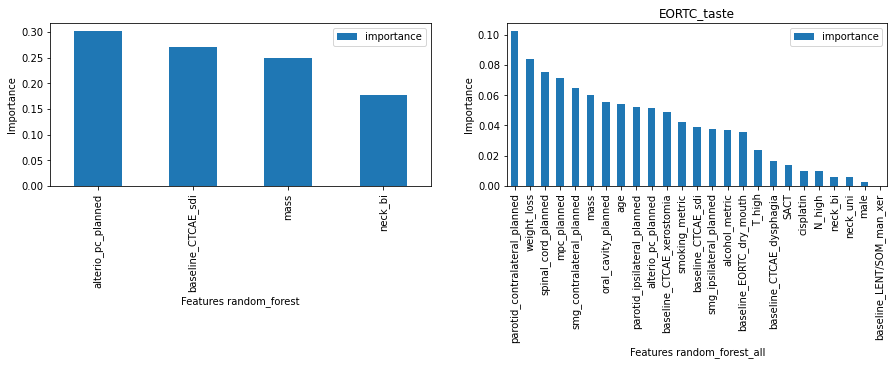

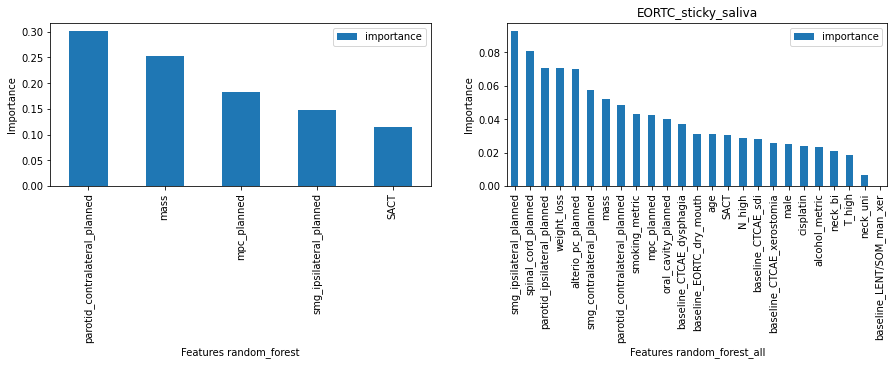

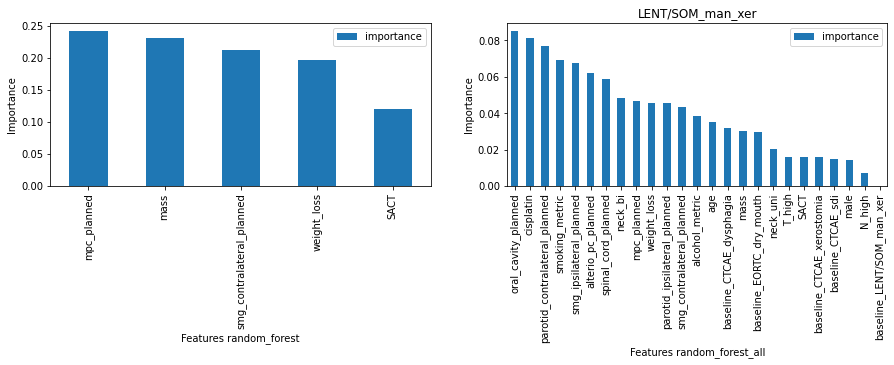

In [31]:
# Train the best random forests on all data
best_features_rf = {}
importance_threshold = 0.04

for outcome in outcomes:
    
    fig, ax = plt.subplots(1, 2, figsize=(15,3))
    
    for a, rf in enumerate(['random_forest', 'random_forest_all']):
        
        params = best_params[outcome][rf]
        if rf == 'random_forest':
            f_to_use = list(best_features[outcome].index)
        else:
            f_to_use = features
        df_no_nan = df[f_to_use + [outcome]].dropna()
        X = df_no_nan[f_to_use]
        y = df_no_nan[outcome]
        model = RandomForestClassifier(n_estimators=75, max_features=params['max_features'],
                                       min_samples_split=params['min_samples_split'],
                                       max_depth=params['max_depth'], class_weight='balanced')
        model.fit(X, y)
        importances = pd.DataFrame(
            model.feature_importances_, 
            index=X.columns, 
            columns=["importance"]).sort_values("importance", ascending=False)
        importances.plot(kind="bar", ax=ax[a])
        ax[a].set_xlabel('Features ' + rf)
        ax[a].set_ylabel('Importance')
        plt.title(outcome);
        
        # Get most important features
        if rf == 'random_forest_all':
            best = importances[importances['importance'] > importance_threshold].copy()
            corr = df[best.index].corr()
            to_drop = []
            for i in range(len(corr)):
                for j in range(i):
                    corr_ij = corr.iloc[i, j]
                    if corr_ij > corr_threshold:
                        to_drop.append(best.index[i])
            best.drop(to_drop, inplace=True)
            print(f'\n Best features for {outcome}:')
            print(best)
            best_features_rf[outcome] = best
            
    display(fig)
        
        

In [32]:
# Train random forests with highest importance features
for outcome in outcomes:
    
    f_to_use = list(best_features_rf[outcome].index)
    df_no_nan = df[f_to_use + [outcome]].dropna()
    X = df_no_nan.drop(outcome, axis=1)
    y = df_no_nan[outcome]
    
    param_grid = {
        "max_depth": [2, 3, 4],
        "max_features": [1, 3, 10],
        "min_samples_split": [2, 3, 10]}
    gridCV = GridSearchCV(RandomForestClassifier(n_estimators=75, class_weight='balanced'), cv=10, 
                          param_grid=param_grid, n_jobs=-1, scoring='roc_auc')
    gridCV.fit(X, y)
    
    rocs[outcome]['random_forest_best'] = gridCV.best_score_
    rocs_std[outcome]['random_forest_best'] = gridCV.cv_results_['std_test_score'][gridCV.best_index_]
    best_params[outcome]['random_forest_best'] = gridCV.best_params_

display(pd.DataFrame(rocs))
display(pd.DataFrame(rocs_std))

CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  \
logistic_regression                 0.674135   0.704318         0.681706   
KNN                                 0.718942   0.723028         0.669921   
SVM                                 0.691474   0.698847         0.681944   
random_forest                       0.753974   0.730227         0.714881   
random_forest_all                   0.623016   0.671667         0.637500   
random_forest_all_nan_zero          0.711538   0.684042         0.668571   
random_forest_PCA                   0.494444   0.599500         0.501786   
random_forest_best                  0.674653   0.612381         0.579464   

                            EORTC_dry_mouth  EORTC_taste  EORTC_sticky_saliva  \
logistic_regression                0.670913     0.688000             0.636667   
KNN                                0.648810     0.676000             0.666667   
SVM                                0.670040     0.672815             0.628056   
random_forest                      0.707817     0.667963             0.659167   
random_forest_all                  0.585000     0.708056             0.669048   
random_forest_all_nan_zero         0.711127     0.682431             0.659209   
random_forest_PCA                  0.513333     0.687222             0.519841   
random_forest_best                 0.662798     0.681607             0.684921   

                            LENT/SOM_man_xer  
logistic_regression                 0.671667  
KNN                                 0.677424  
SVM                                 0.673333  
random_forest                       0.686061  
random_forest_all                   0.736944  
random_forest_all_nan_zero          0.721505  
random_forest_PCA                   0.673056  
random_forest_best                  0.699444


 CTCAE_xerostomia

 random_forest
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       126
           1       0.46      0.70      0.56        43

    accuracy                           0.72       169
   macro avg       0.67      0.71      0.67       169
weighted avg       0.77      0.72      0.73       169



Predicted    0   1  All
True                   
0           91  35  126
1           13  30   43
All        104  65  169

Full dataset ROC: 0.8232742709486897
Cross-validation ROC: 0.7099483204134367

 logistic_regression
              precision    recall  f1-score   support

           0       0.87      0.48      0.62       126
           1       0.34      0.79      0.48        43

    accuracy                           0.56       169
   macro avg       0.61      0.64      0.55       169
weighted avg       0.74      0.56      0.59       169



Predicted   0   1  All
True                  
0          61  65  126
1           9  34   43
All        70  99  169

Full dataset ROC: 0.7128091546696198
Cross-validation ROC: 0.6374123292727943


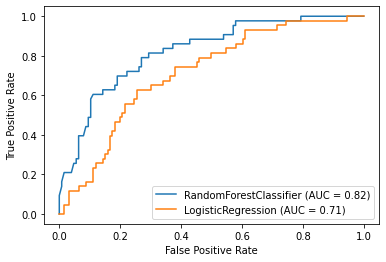


 CTCAE_sdi

 random_forest
              precision    recall  f1-score   support

           0       0.71      0.51      0.60       105
           1       0.52      0.71      0.60        77

    accuracy                           0.60       182
   macro avg       0.61      0.61      0.60       182
weighted avg       0.63      0.60      0.60       182



Predicted   0    1  All
True                   
0          54   51  105
1          22   55   77
All        76  106  182

Full dataset ROC: 0.7747680890538033
Cross-validation ROC: 0.6142857142857143

 logistic_regression
              precision    recall  f1-score   support

           0       0.75      0.55      0.64       105
           1       0.55      0.75      0.64        77

    accuracy                           0.64       182
   macro avg       0.65      0.65      0.64       182
weighted avg       0.67      0.64      0.64       182



Predicted   0    1  All
True                   
0          58   47  105
1          19   58   77
All        77  105  182

Full dataset ROC: 0.719851576994434
Cross-validation ROC: 0.6528138528138528


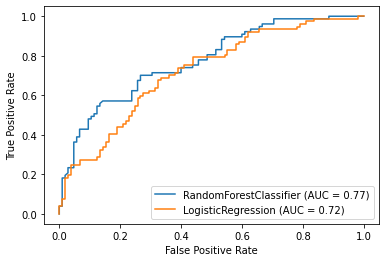


 CTCAE_dysphagia

 random_forest
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       147
           1       0.26      0.38      0.30        32

    accuracy                           0.69       179
   macro avg       0.55      0.57      0.55       179
weighted avg       0.74      0.69      0.71       179



Predicted    0   1  All
True                   
0          112  35  147
1           20  12   32
All        132  47  179

Full dataset ROC: 0.8914753401360545
Cross-validation ROC: 0.5684523809523808

 logistic_regression
              precision    recall  f1-score   support

           0       0.92      0.50      0.65       147
           1       0.26      0.81      0.39        32

    accuracy                           0.55       179
   macro avg       0.59      0.65      0.52       179
weighted avg       0.81      0.55      0.60       179



Predicted   0    1  All
True                   
0          73   74  147
1           6   26   32
All        79  100  179

Full dataset ROC: 0.7072704081632653
Cross-validation ROC: 0.6545493197278911


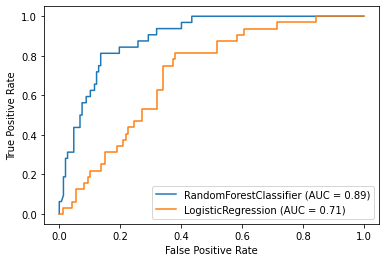


 EORTC_dry_mouth

 random_forest
              precision    recall  f1-score   support

           0       0.72      0.55      0.63        94
           1       0.57      0.73      0.64        75

    accuracy                           0.63       169
   macro avg       0.64      0.64      0.63       169
weighted avg       0.65      0.63      0.63       169



Predicted   0   1  All
True                  
0          52  42   94
1          20  55   75
All        72  97  169

Full dataset ROC: 0.8097163120567377
Cross-validation ROC: 0.6432624113475177

 logistic_regression
              precision    recall  f1-score   support

           0       0.76      0.54      0.63        94
           1       0.58      0.79      0.67        75

    accuracy                           0.65       169
   macro avg       0.67      0.66      0.65       169
weighted avg       0.68      0.65      0.65       169



Predicted   0    1  All
True                   
0          51   43   94
1          16   59   75
All        67  102  169

Full dataset ROC: 0.7139007092198582
Cross-validation ROC: 0.6646099290780143


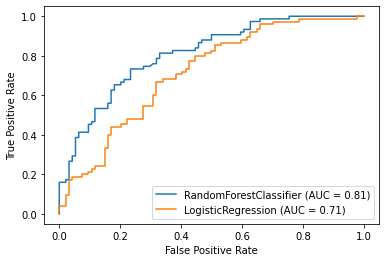


 EORTC_taste

 random_forest
              precision    recall  f1-score   support

           0       0.66      0.50      0.57        94
           1       0.41      0.57      0.47        56

    accuracy                           0.53       150
   macro avg       0.53      0.54      0.52       150
weighted avg       0.57      0.53      0.53       150



Predicted   0   1  All
True                  
0          47  47   94
1          24  32   56
All        71  79  150

Full dataset ROC: 0.7670022796352584
Cross-validation ROC: 0.5357142857142857

 logistic_regression
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        94
           1       0.45      0.59      0.51        56

    accuracy                           0.57       150
   macro avg       0.57      0.58      0.57       150
weighted avg       0.60      0.57      0.58       150



Predicted   0   1  All
True                  
0          53  41   94
1          23  33   56
All        76  74  150

Full dataset ROC: 0.7104863221884499
Cross-validation ROC: 0.5765577507598785


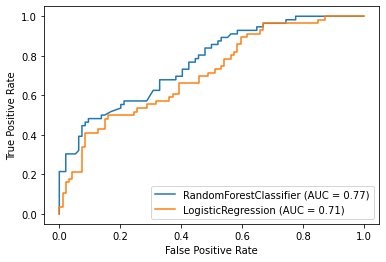


 EORTC_sticky_saliva

 random_forest
              precision    recall  f1-score   support

           0       0.77      0.51      0.62        94
           1       0.39      0.67      0.49        43

    accuracy                           0.56       137
   macro avg       0.58      0.59      0.55       137
weighted avg       0.65      0.56      0.58       137



Predicted   0   1  All
True                  
0          48  46   94
1          14  29   43
All        62  75  137

Full dataset ROC: 0.8051707075705096
Cross-validation ROC: 0.5925284512617516

 logistic_regression
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        94
           1       0.38      0.70      0.49        43

    accuracy                           0.55       137
   macro avg       0.58      0.59      0.54       137
weighted avg       0.65      0.55      0.56       137



Predicted   0   1  All
True                  
0          45  49   94
1          13  30   43
All        58  79  137

Full dataset ROC: 0.7117763483424048
Cross-validation ROC: 0.5881989114299851


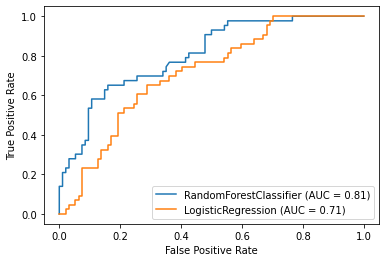


 LENT/SOM_man_xer

 random_forest
              precision    recall  f1-score   support

           0       0.80      0.58      0.67       113
           1       0.45      0.70      0.55        56

    accuracy                           0.62       169
   macro avg       0.62      0.64      0.61       169
weighted avg       0.68      0.62      0.63       169



Predicted   0   1  All
True                  
0          66  47  113
1          17  39   56
All        83  86  169

Full dataset ROC: 0.8463969658659923
Cross-validation ROC: 0.6402496839443742

 logistic_regression
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       113
           1       0.46      0.73      0.56        56

    accuracy                           0.62       169
   macro avg       0.63      0.65      0.61       169
weighted avg       0.69      0.62      0.63       169



Predicted   0   1  All
True                  
0          64  49  113
1          15  41   56
All        79  90  169

Full dataset ROC: 0.7040139064475348
Cross-validation ROC: 0.6492572692793932


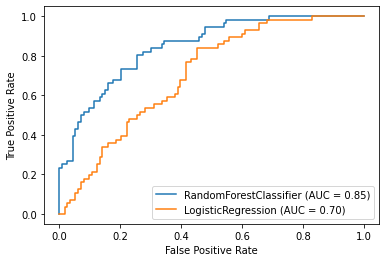

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

# Show confusion matrices
for outcome in outcomes:
    
    # Get data
    f_to_use = list(best_features[outcome].index)
    df_no_nan = df[f_to_use + [outcome]].dropna()
    X = df_no_nan.drop(outcome, axis=1)
    y = df_no_nan[outcome]
    
    # Train the random forest on all data
    models = {}
    params = best_params[outcome]['random_forest']
    models['random_forest'] = RandomForestClassifier(
        n_estimators=75, max_features=params['max_features'],
        min_samples_split=params['min_samples_split'],
        max_depth=params['max_depth'],
        class_weight='balanced')
    models['logistic_regression'] = LogisticRegression(class_weight='balanced')
    
    print('\n', outcome)
    fig = plt.figure();
    ax = plt.gca();
    for name, model in models.items():
        
        model.fit(X, y)
        y_pred = cross_val_predict(model, X, y, cv=10)
        print('\n', name)
        print(classification_report(y, y_pred))
        display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
        plot_roc_curve(model, X, y, ax=ax);
        print('Full dataset ROC:', roc_auc_score(y, model.predict_proba(X)[:, 1]))
        print('Cross-validation ROC:', roc_auc_score(y, y_pred))
        
    plt.show()
        

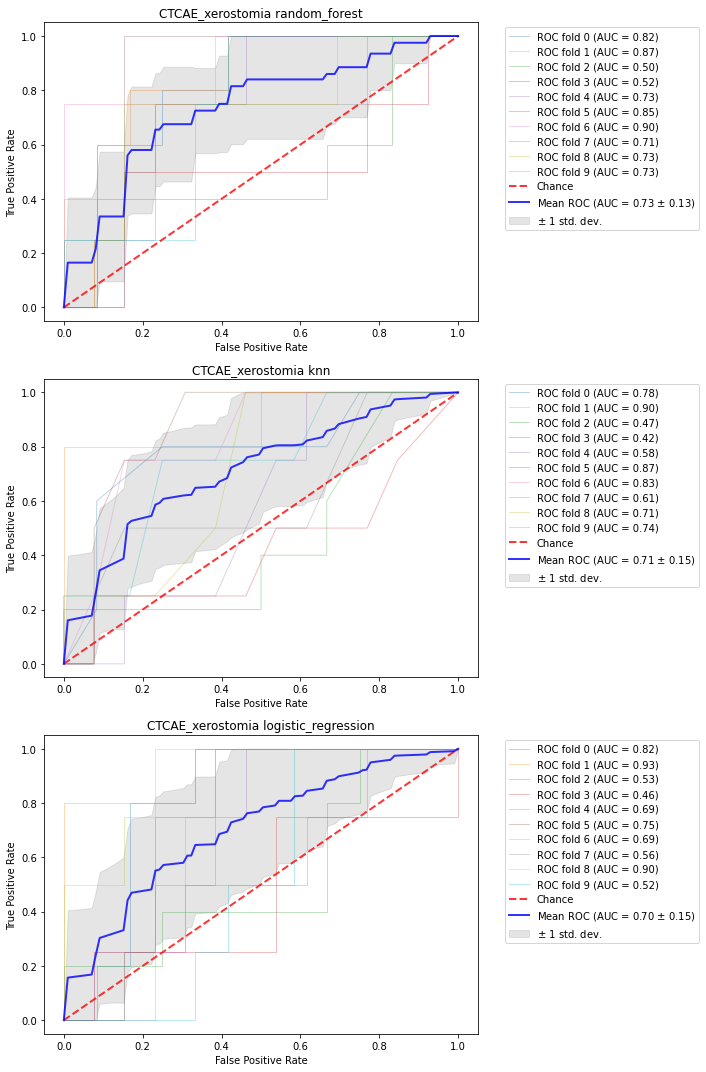

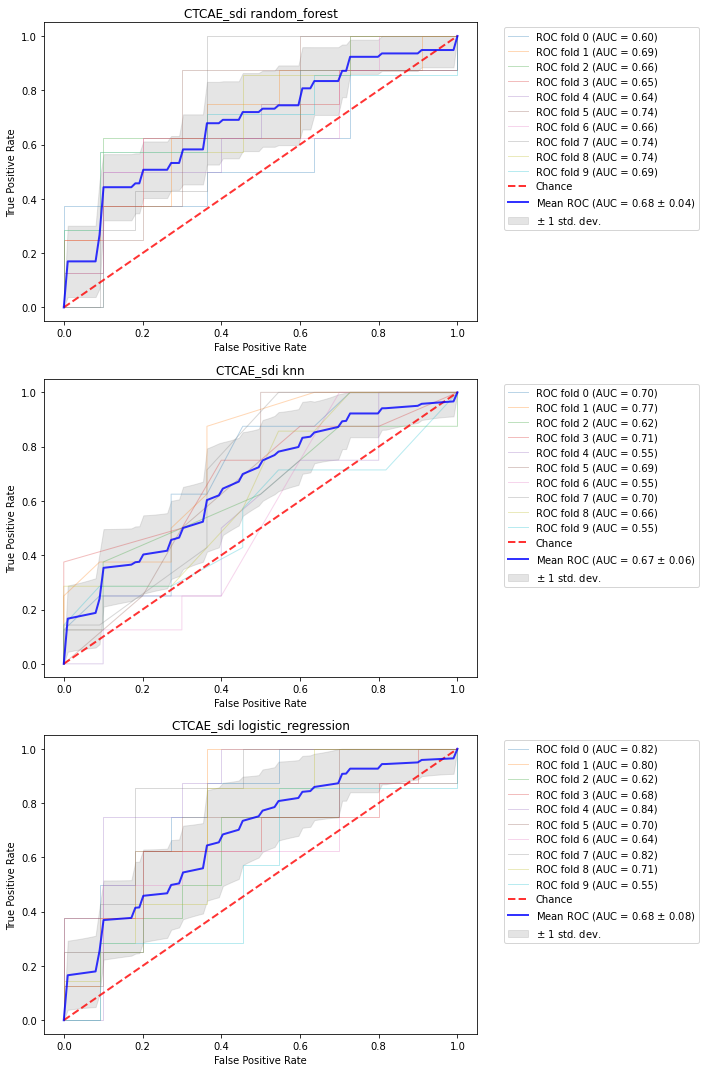

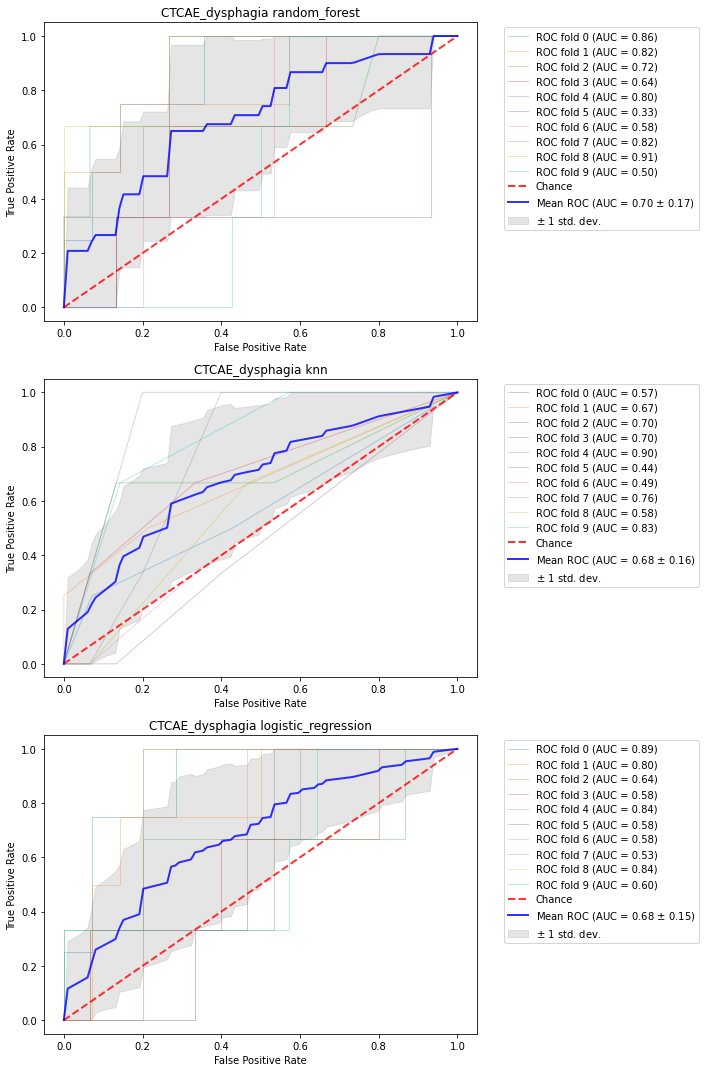

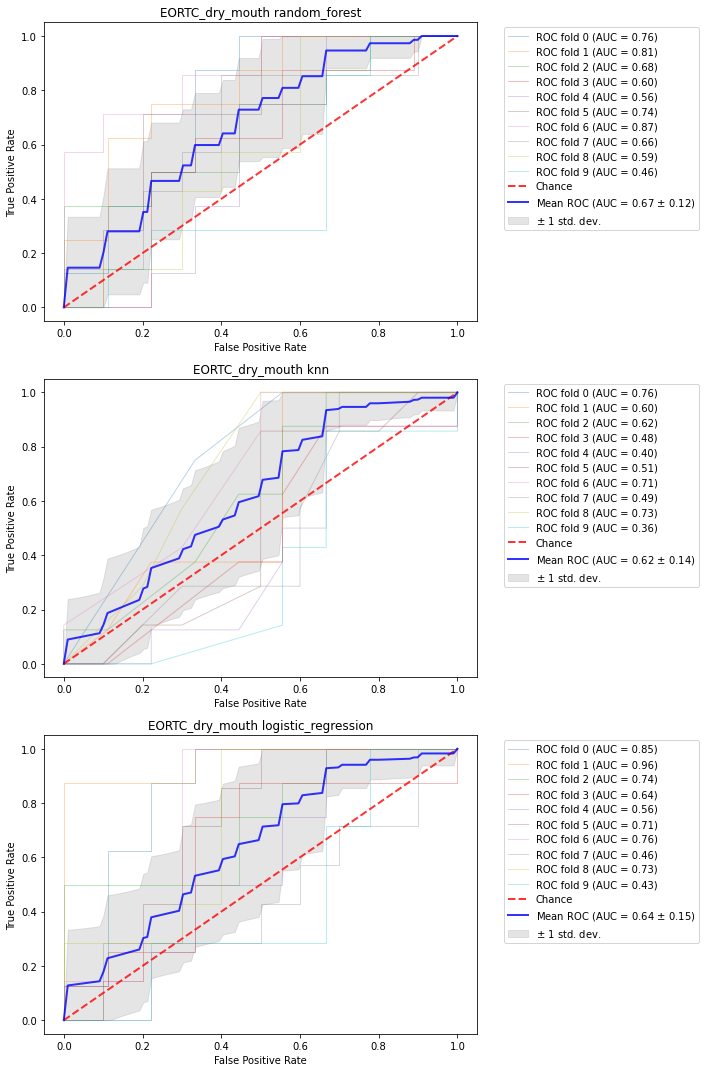

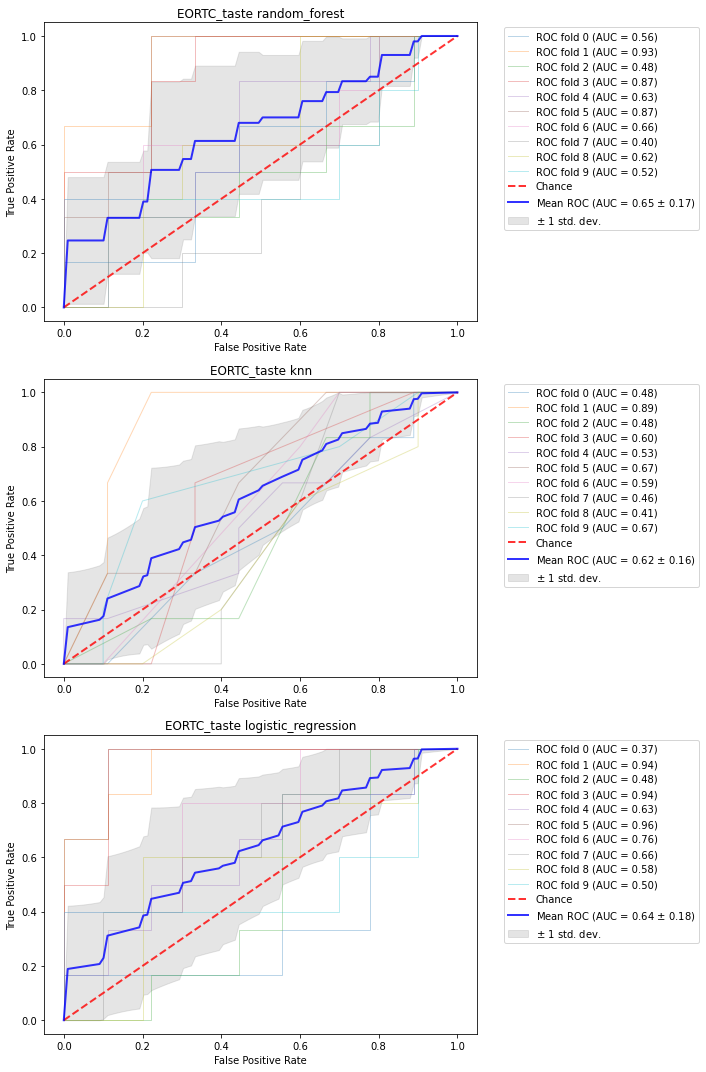

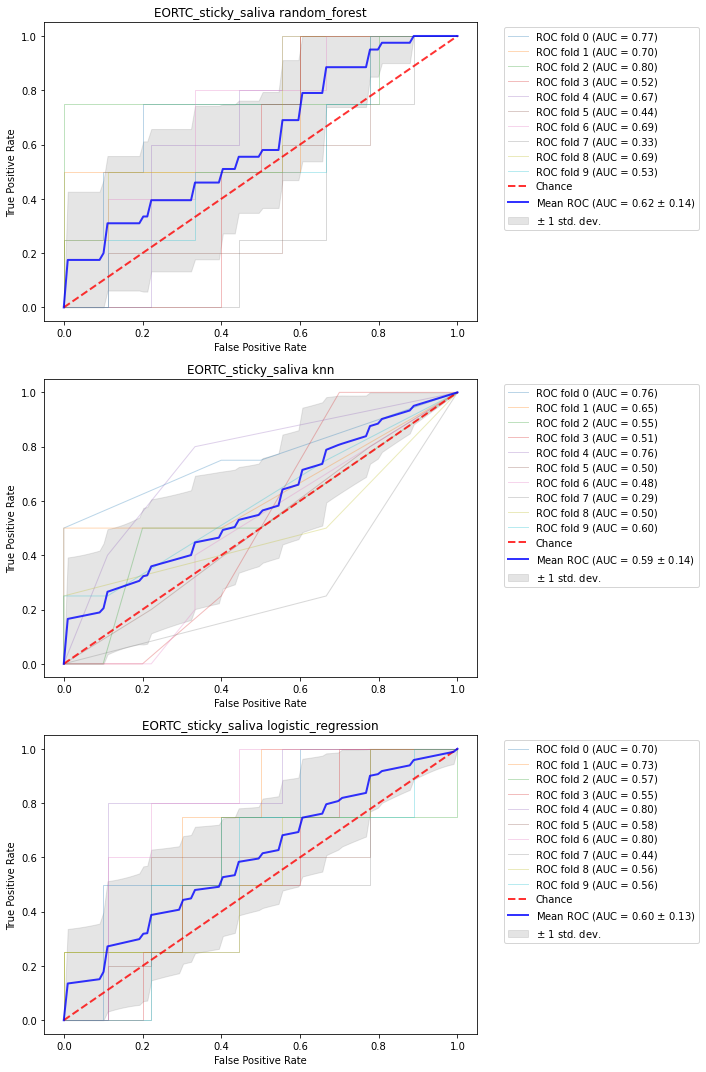

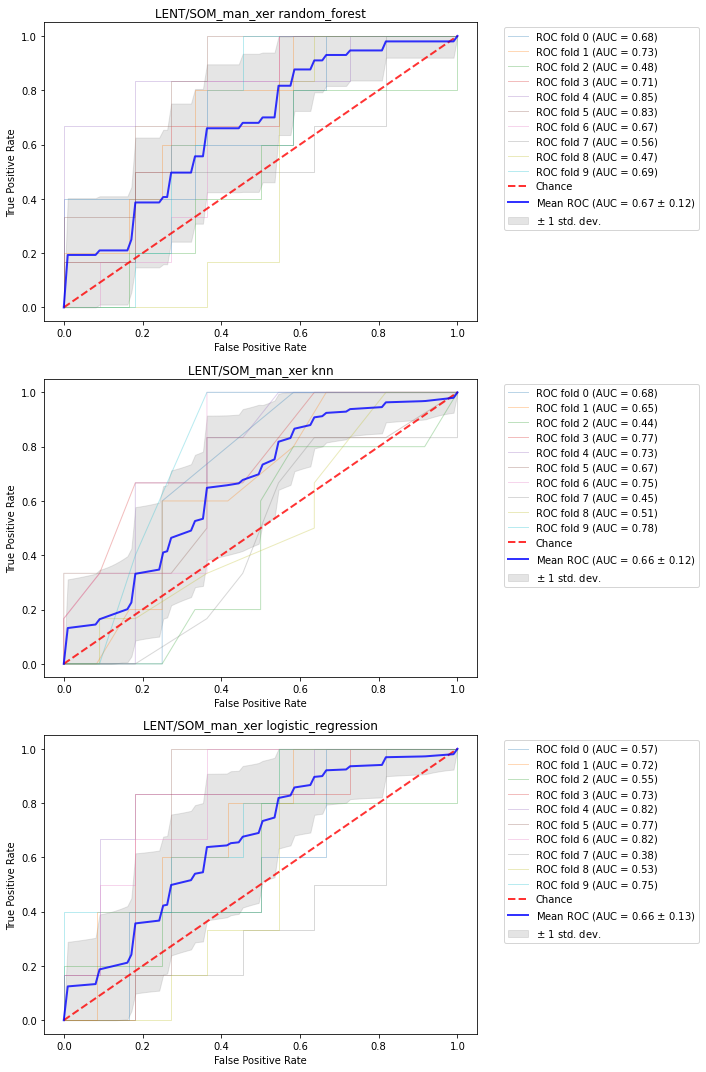

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc

# Plot ROC curves for different test-train splits
for outcome in outcomes:
    
    # Get data
    f_to_use = list(best_features[outcome].index)
    df_no_nan = df[f_to_use + [outcome]].dropna()
    X = np.array(df_no_nan.drop(outcome, axis=1).values)
    y = np.array(df_no_nan[outcome].values)
    
    # k-fold
    cv = StratifiedKFold(n_splits=10)
    
    models = {}
    models['random_forest'] = RandomForestClassifier(
        n_estimators=75, max_features=params['max_features'],
        min_samples_split=params['min_samples_split'],
        max_depth=params['max_depth'],
        class_weight='balanced')
    models['knn'] = KNeighborsClassifier(n_neighbors=best_params[outcome]['KNN']['n_neighbors'])
    models['logistic_regression'] = LogisticRegression(max_iter=500)
    
    fig, ax = plt.subplots(3, 1, figsize=(10, 15));
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for m, (name, model) in enumerate(models.items()):

        for i, (train, test) in enumerate(cv.split(X, y)):

            model.fit(X[train], y[train])
            viz = plot_roc_curve(model, X[test], y[test], name='ROC fold {}'.format(i),
                               alpha=0.3, ax=ax[m], lw=1)
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)

        ax[m].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax[m].plot(mean_fpr, mean_tpr, color='b',
                label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                lw=2, alpha=.8)

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax[m].fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                        label=r'$\pm$ 1 std. dev.')

        ax[m].set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
               title=outcome + ' ' + name)
        ax[m].legend(loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    try:
        plt.savefig(f'figs/{outcome}.png', dpi=150)
    except FileNotFoundError:
        plt.savefig(f'figs/{outcome.replace("/", "_")}.png', dpi=150)
    plt.show()

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score


# Try boosted decision trees
# Method for optimising based on https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, cv_folds=10):
    
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    pred = alg.predict(X)
    predprob = alg.predict_proba(X)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : {:.4g}".format(accuracy_score(y.values, pred)))
    print("AUC Score (Train): {}".format(roc_auc_score(y, predprob)))
    
    if performCV:
        print("CV Score : Mean - {:.7g} | Std - {:.7g} | Min - {:.7g} | Max - {:.7g}".format(
            np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
        
    #Print Feature Importance:
    feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
    if printFeatureImportance:
        plt.figure()
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()
        
    # Return best AUC and best features
    best_score = gridCV.best_score_
    feats = list(feat_imp[feat_imp > 0.1].index)
    return np.mean(cv_score), feats
        




bdt_rocs = {}
#best_features_bdt = {}

for outcome in outcomes:
    
    # Try with best features only and all features
    bdt_rocs[outcome] = {}
    fs = {
        'best': best_features[outcome],
        'all': features,
        'best_bdt': best_features_bdt[outcome]
    }
    for f, f_to_use in fs.items():
        
        print(f'\n{outcome} using {f} features:\n')
        X, y = get_data(df, f_to_use)
        
        # Baseline model
        gbm0 = GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3)
        bdt_rocs[outcome][f], feats = modelfit(gbm0, X, y)
        
        # Add to list of good features
#         if f == 'all':
#             feats = set(feats)
#             orig_features = set(best_features[outcome])
#             print('Adding to best features:')
#             print(feats.difference(orig_features))
#             best_features_bdt[outcome] = list(orig_features.union(feats))
        


CTCAE_xerostomia using best features:



TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [89]:
pd.DataFrame(bdt_rocs)

CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  EORTC_dry_mouth  \
best              0.692981   0.565081         0.691151         0.585913   
all               0.658730   0.730833         0.389286         0.466667   
best_bdt          0.710370   0.604416         0.614405         0.556548   

          EORTC_taste  EORTC_sticky_saliva  LENT/SOM_man_xer  
best         0.584444             0.575278          0.655606  
all          0.705833             0.575397          0.708333  
best_bdt     0.571704             0.565741          0.703333

In [91]:
best_n_estimators = {}
param_test1 = {'n_estimators': range(20, 81, 10)}
for outcome in outcomes:

    print(f'\n{outcome}:')
    X, y = get_data(df, best_features_bdt[outcome])
    gbm0 = GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3)
    gsearch1 = GridSearchCV(estimator=gbm0, param_grid=param_test1, scoring='roc_auc', n_jobs=-1, cv=10)
    gsearch1.fit(X, y)
    print('Best estimators:', gsearch1.best_params_['n_estimators'])
    print('ROC AUC:', gsearch1.best_score_)
    best_n_estimators[outcome] = gsearch1.best_params_['n_estimators']
    


CTCAE_xerostomia:
Best estimators: 70
ROC AUC: 0.7559259259259259

CTCAE_sdi:
Best estimators: 60
ROC AUC: 0.6207954545454545

CTCAE_dysphagia:
Best estimators: 20
ROC AUC: 0.6881349206349207

EORTC_dry_mouth:
Best estimators: 20
ROC AUC: 0.5667857142857142

EORTC_taste:
Best estimators: 20
ROC AUC: 0.6038888888888889

EORTC_sticky_saliva:
Best estimators: 50
ROC AUC: 0.6074074074074075

LENT/SOM_man_xer:
Best estimators: 50
ROC AUC: 0.7133333333333333


In [93]:
# Search for best max depth/min samples split
param_test2 = {'max_depth': range(1, 8), 'min_samples_split': range(2, 40, 2)}
best_max_depth = {}
best_min_samples_split = {}

for outcome in outcomes:

    print(f'\n{outcome}:')
    X, y = get_data(df, best_features_bdt[outcome])
    gbm1 = GradientBoostingClassifier(min_samples_leaf=2, n_estimators=best_n_estimators[outcome])
    gsearch2 = GridSearchCV(estimator=gbm1, param_grid=param_test2, scoring='roc_auc', n_jobs=-1, cv=10)
    gsearch2.fit(X, y)
    print('Best estimators:', gsearch2.best_params_)
    print('ROC AUC:', gsearch2.best_score_)
    best_max_depth[outcome] = gsearch2.best_params_['max_depth']
    best_min_samples_split[outcome] = gsearch2.best_params_['min_samples_split']



CTCAE_xerostomia:
Best estimators: {'max_depth': 6, 'min_samples_split': 30}
ROC AUC: 0.7768518518518518

CTCAE_sdi:
Best estimators: {'max_depth': 1, 'min_samples_split': 2}
ROC AUC: 0.6407873376623376

CTCAE_dysphagia:
Best estimators: {'max_depth': 6, 'min_samples_split': 2}
ROC AUC: 0.7448809523809523

EORTC_dry_mouth:
Best estimators: {'max_depth': 3, 'min_samples_split': 26}
ROC AUC: 0.6085714285714287

EORTC_taste:
Best estimators: {'max_depth': 3, 'min_samples_split': 16}
ROC AUC: 0.6544074074074074

EORTC_sticky_saliva:
Best estimators: {'max_depth': 4, 'min_samples_split': 18}
ROC AUC: 0.6490740740740739

LENT/SOM_man_xer:
Best estimators: {'max_depth': 6, 'min_samples_split': 38}
ROC AUC: 0.7411111111111112


In [100]:
# Now try different min samples leaf
param_test3 = {'min_samples_leaf': range(2, 40, 2)}
best_min_samples_leaf = {}

for outcome in outcomes:

    print(f'\n{outcome}:')
    
    # Also try higher values of min_samples_split if the original optimal value was high
    try_min_samples_split = False
    if best_min_samples_split[outcome] >= 30:
        try_min_samples_split = True
        param_test3['min_samples_split'] = range(30, 60, 2)
        
    X, y = get_data(df, best_features_bdt[outcome])
    
    if try_min_samples_split:
        gbm2 = GradientBoostingClassifier(n_estimators=best_n_estimators[outcome],
                                          max_depth=best_max_depth[outcome], class_weight='balanced')
    else:
        gbm2 = GradientBoostingClassifier(n_estimators=best_n_estimators[outcome],
                                          max_depth=best_max_depth[outcome],
                                          min_samples_split=best_min_samples_split[outcome])
        
    gsearch3 = GridSearchCV(estimator=gbm2, param_grid=param_test3, scoring='roc_auc', n_jobs=-1, cv=10)
    gsearch3.fit(X, y)
    
    print('Best estimators:', gsearch3.best_params_)
    print('ROC AUC:', gsearch3.best_score_)
    best_min_samples_leaf[outcome] = gsearch3.best_params_['min_samples_leaf']
    if try_min_samples_split:
        best_min_samples_split[outcome] = gsearch3.best_params_['min_samples_split']


CTCAE_xerostomia:
Best estimators: {'min_samples_leaf': 6, 'min_samples_split': 40}
ROC AUC: 0.7757407407407408

CTCAE_sdi:
Best estimators: {'min_samples_leaf': 34, 'min_samples_split': 30}
ROC AUC: 0.6741314935064935

CTCAE_dysphagia:
Best estimators: {'min_samples_leaf': 34, 'min_samples_split': 30}
ROC AUC: 0.7094642857142857

EORTC_dry_mouth:
Best estimators: {'min_samples_leaf': 4, 'min_samples_split': 34}
ROC AUC: 0.6257142857142857

EORTC_taste:
Best estimators: {'min_samples_leaf': 22, 'min_samples_split': 30}
ROC AUC: 0.6555555555555556

EORTC_sticky_saliva:
Best estimators: {'min_samples_leaf': 18, 'min_samples_split': 54}
ROC AUC: 0.6425925925925926

LENT/SOM_man_xer:
Best estimators: {'min_samples_leaf': 20, 'min_samples_split': 46}
ROC AUC: 0.7641666666666667


In [104]:
# Next tune max features
best_max_features = {}

for outcome in outcomes:

    print(f'\n{outcome}:')
    n_features = len(best_features_bdt[outcome])
    min_features = np.floor(np.sqrt(n_features) - 2)
    if min_features < 2:
        min_features = 2
    param_test4 = {'max_features': range(min_features, n_features, 1)}
    
    X, y = get_data(df, best_features_bdt[outcome])
    gbm3 = GradientBoostingClassifier(min_samples_leaf=best_min_samples_leaf[outcome],
                                      min_samples_split=best_min_samples_split[outcome],
                                      n_estimators=best_n_estimators[outcome],
                                      max_depth=best_max_depth[outcome])
    
    gsearch4 = GridSearchCV(estimator=gbm3, param_grid=param_test4, scoring='roc_auc', n_jobs=-1, cv=10)
    gsearch4.fit(X, y)
    print('Best estimators:', gsearch4.best_params_)
    print('ROC AUC:', gsearch4.best_score_)
    best_max_features[outcome] = gsearch4.best_params_['max_features']


CTCAE_xerostomia:
Best estimators: {'max_features': 2}
ROC AUC: 0.7637037037037037

CTCAE_sdi:
Best estimators: {'max_features': 2}
ROC AUC: 0.6889042207792208

CTCAE_dysphagia:
Best estimators: {'max_features': 2}
ROC AUC: 0.6972619047619049

EORTC_dry_mouth:
Best estimators: {'max_features': 3}
ROC AUC: 0.5886904761904762

EORTC_taste:
Best estimators: {'max_features': 4}
ROC AUC: 0.6595555555555556

EORTC_sticky_saliva:
Best estimators: {'max_features': 4}
ROC AUC: 0.6435185185185185

LENT/SOM_man_xer:
Best estimators: {'max_features': 7}
ROC AUC: 0.7424999999999999


In [111]:
# Try reducing the learning rate
best_params_gbdt = {}
for outcome in outcomes:

    print(f'\n{outcome}:')
    X, y = get_data(df, best_features_bdt[outcome])
    n_est = best_n_estimators[outcome]
    param_test5 = {
        'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1],
        'n_estimators': range(n_est, n_est * 10, n_est)
    }
    
    gbm_tuned1 = GradientBoostingClassifier(
        learning_rate = 0.05,
        min_samples_leaf=best_min_samples_leaf[outcome],
        min_samples_split=best_min_samples_split[outcome],
        max_depth=best_max_depth[outcome],
        max_features=best_max_features[outcome])

    gsearch5 = GridSearchCV(estimator=gbm_tuned1, param_grid=param_test5, scoring='roc_auc', n_jobs=-1, cv=10)
    gsearch5.fit(X, y)
    print('Best estimators:', gsearch5.best_params_)
    print('ROC AUC:', gsearch5.best_score_)
    
    best_params_gbdt[outcome] = {
        'min_samples_leaf': best_min_samples_leaf[outcome],
        'min_samples_split': best_min_samples_split[outcome],
        'max_depth': best_max_depth[outcome],
        'max_features': best_max_features[outcome],
        'n_estimators': gsearch5.best_params_['n_estimators'],
        'learning_rate': gsearch5.best_params_['learning_rate']
    }
    
    rocs[outcome]['BDT'] = gsearch5.best_score_
    rocs_std[outcome]['BDT'] = gsearch5.cv_results_['std_test_score'][gsearch5.best_index_]
    


CTCAE_xerostomia:
Best estimators: {'learning_rate': 0.05, 'n_estimators': 630}
ROC AUC: 0.7666666666666667

CTCAE_sdi:
Best estimators: {'learning_rate': 0.05, 'n_estimators': 480}
ROC AUC: 0.7082548701298702

CTCAE_dysphagia:
Best estimators: {'learning_rate': 0.005, 'n_estimators': 120}
ROC AUC: 0.7440476190476191

EORTC_dry_mouth:
Best estimators: {'learning_rate': 0.005, 'n_estimators': 40}
ROC AUC: 0.5842261904761906

EORTC_taste:
Best estimators: {'learning_rate': 0.005, 'n_estimators': 60}
ROC AUC: 0.6742222222222223

EORTC_sticky_saliva:
Best estimators: {'learning_rate': 0.1, 'n_estimators': 50}
ROC AUC: 0.6222222222222222

LENT/SOM_man_xer:
Best estimators: {'learning_rate': 0.01, 'n_estimators': 350}
ROC AUC: 0.7655555555555555


In [112]:
display(pd.DataFrame(rocs))
display(pd.DataFrame(rocs_std))

CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  \
logistic_regression                 0.674135   0.704318         0.681706   
KNN                                 0.718942   0.723028         0.669921   
SVM                                 0.691474   0.698847         0.681944   
random_forest                       0.753974   0.730227         0.714881   
random_forest_all                   0.623016   0.671667         0.637500   
random_forest_all_nan_zero          0.711538   0.684042         0.668571   
random_forest_PCA                   0.494444   0.599500         0.501786   
random_forest_best                  0.674653   0.612381         0.579464   
BDT                                 0.766667   0.708255         0.744048   

                            EORTC_dry_mouth  EORTC_taste  EORTC_sticky_saliva  \
logistic_regression                0.670913     0.688000             0.636667   
KNN                                0.648810     0.676000             0.666667   
SVM                                0.670040     0.672815             0.628056   
random_forest                      0.707817     0.667963             0.659167   
random_forest_all                  0.585000     0.708056             0.669048   
random_forest_all_nan_zero         0.711127     0.682431             0.659209   
random_forest_PCA                  0.513333     0.687222             0.519841   
random_forest_best                 0.662798     0.681607             0.684921   
BDT                                0.584226     0.674222             0.622222   

                            LENT/SOM_man_xer  
logistic_regression                 0.671667  
KNN                                 0.677424  
SVM                                 0.673333  
random_forest                       0.686061  
random_forest_all                   0.736944  
random_forest_all_nan_zero          0.721505  
random_forest_PCA                   0.673056  
random_forest_best                  0.699444  
BDT                                 0.765556

CTCAE_xerostomia  CTCAE_sdi  CTCAE_dysphagia  \
logistic_regression                 0.164748   0.096421         0.134261   
KNN                                 0.174610   0.093472         0.113080   
SVM                                 0.157868   0.055707         0.130380   
random_forest                       0.123495   0.058789         0.189887   
random_forest_all                   0.196603   0.147958         0.263694   
random_forest_all_nan_zero          0.109075   0.104208         0.102551   
random_forest_PCA                   0.277461   0.180991         0.258368   
random_forest_best                  0.149112   0.189930         0.298098   
BDT                                 0.102764   0.106455         0.095633   

                            EORTC_dry_mouth  EORTC_taste  EORTC_sticky_saliva  \
logistic_regression                0.089086     0.176542             0.168200   
KNN                                0.145208     0.132472             0.125941   
SVM                                0.136054     0.136783             0.132068   
random_forest                      0.116261     0.168685             0.137426   
random_forest_all                  0.197547     0.101063             0.188951   
random_forest_all_nan_zero         0.089411     0.130435             0.140624   
random_forest_PCA                  0.189157     0.129405             0.215436   
random_forest_best                 0.218499     0.107295             0.207993   
BDT                                0.202233     0.133432             0.159076   

                            LENT/SOM_man_xer  
logistic_regression                 0.167309  
KNN                                 0.117326  
SVM                                 0.130838  
random_forest                       0.110375  
random_forest_all                   0.131627  
random_forest_all_nan_zero          0.156959  
random_forest_PCA                   0.131949  
random_forest_best                  0.160087  
BDT                                 0.148554


Model Report
Accuracy : 1
AUC Score (Train): 1.0
CV Score : Mean - 0.7438889 | Std - 0.1047993 | Min - 0.5833333 | Max - 0.9166667


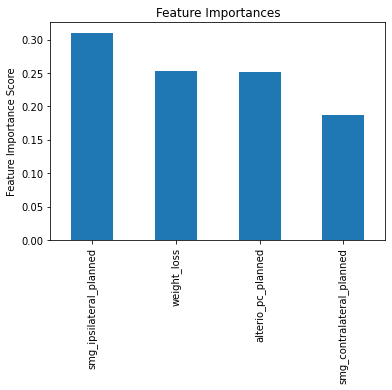


Model Report
Accuracy : 0.7765
AUC Score (Train): 0.8517501277465508
CV Score : Mean - 0.7007062 | Std - 0.10316 | Min - 0.5844156 | Max - 0.9


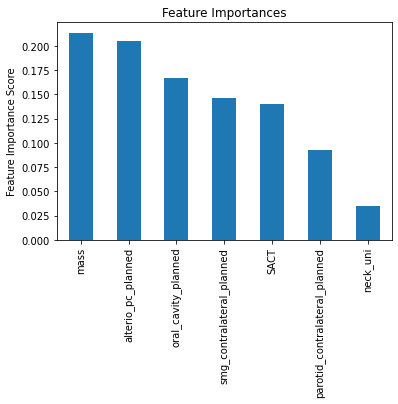


Model Report
Accuracy : 0.8212
AUC Score (Train): 0.8062287414965986
CV Score : Mean - 0.7361111 | Std - 0.09399959 | Min - 0.5222222 | Max - 0.8666667


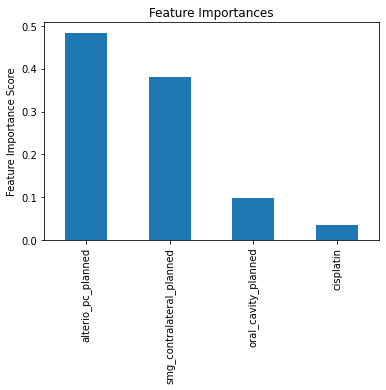


Model Report
Accuracy : 0.5859
AUC Score (Train): 0.8342138364779873
CV Score : Mean - 0.5473214 | Std - 0.2031518 | Min - 0.15 | Max - 0.8571429


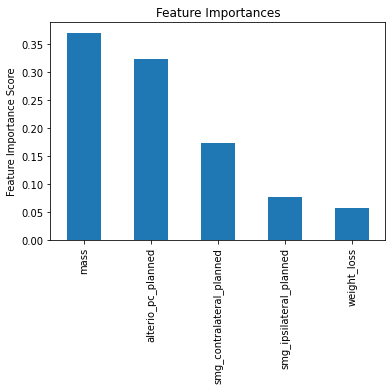


Model Report
Accuracy : 0.6327
AUC Score (Train): 0.8020708880923935
CV Score : Mean - 0.6569259 | Std - 0.1204492 | Min - 0.5092593 | Max - 0.8333333


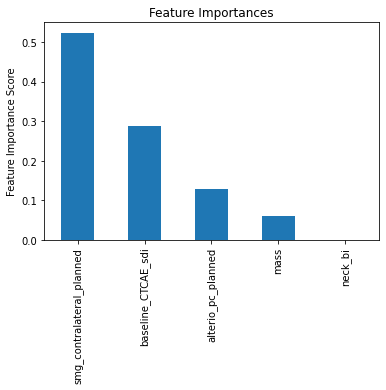


Model Report
Accuracy : 0.8906
AUC Score (Train): 0.9707602339181286
CV Score : Mean - 0.6287037 | Std - 0.1679197 | Min - 0.3611111 | Max - 0.9259259


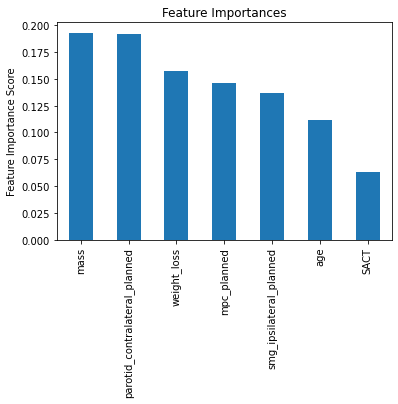


Model Report
Accuracy : 0.8978
AUC Score (Train): 0.9580241187384044
CV Score : Mean - 0.7652778 | Std - 0.1472864 | Min - 0.5555556 | Max - 0.9777778


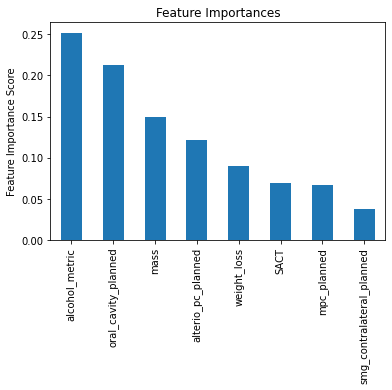

In [126]:
# Show importances of each best BDT
for outcome in outcomes:
    
    X, y = get_data(df, best_features_bdt[outcome])
    bdt = GradientBoostingClassifier(**best_params_gbdt[outcome])
    modelfit(bdt, X, y)

random_forest
Classification report for CTCAE_xerostomia, random_forest:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       126
           1       0.49      0.65      0.56        43

    accuracy                           0.74       169
   macro avg       0.68      0.71      0.69       169
weighted avg       0.77      0.74      0.75       169

KNN
Classification report for CTCAE_xerostomia, KNN:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       126
           1       0.43      0.14      0.21        43

    accuracy                           0.73       169
   macro avg       0.59      0.54      0.53       169
weighted avg       0.68      0.73      0.68       169

logistic_regression
Classification report for CTCAE_xerostomia, logistic_regression:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       126
           1       0.25   

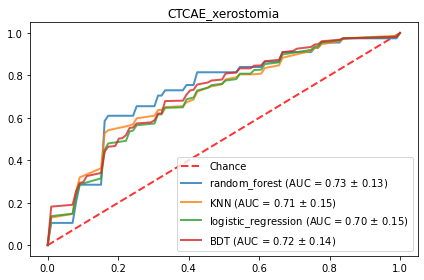

random_forest
Classification report for CTCAE_sdi, random_forest:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       105
           1       0.55      0.71      0.62        77

    accuracy                           0.63       182
   macro avg       0.64      0.64      0.63       182
weighted avg       0.65      0.63      0.63       182

KNN
Classification report for CTCAE_sdi, KNN:
              precision    recall  f1-score   support

           0       0.60      0.71      0.66       105
           1       0.48      0.36      0.41        77

    accuracy                           0.57       182
   macro avg       0.54      0.54      0.53       182
weighted avg       0.55      0.57      0.55       182

logistic_regression
Classification report for CTCAE_sdi, logistic_regression:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       105
           1       0.58      0.61      0.59    

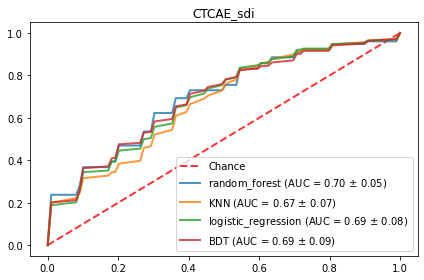

random_forest
Classification report for CTCAE_dysphagia, random_forest:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       147
           1       0.24      0.50      0.33        32

    accuracy                           0.63       179
   macro avg       0.55      0.58      0.54       179
weighted avg       0.75      0.63      0.67       179

KNN
Classification report for CTCAE_dysphagia, KNN:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       147
           1       0.38      0.25      0.30        32

    accuracy                           0.79       179
   macro avg       0.61      0.58      0.59       179
weighted avg       0.76      0.79      0.78       179

logistic_regression
Classification report for CTCAE_dysphagia, logistic_regression:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       147
           1       0.00      

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for CTCAE_dysphagia, BDT:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       147
           1       0.00      0.00      0.00        32

    accuracy                           0.82       179
   macro avg       0.41      0.50      0.45       179
weighted avg       0.67      0.82      0.74       179



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


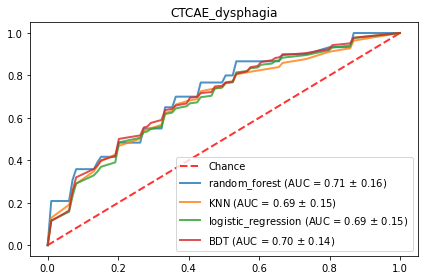

random_forest
Classification report for EORTC_dry_mouth, random_forest:
              precision    recall  f1-score   support

           0       0.73      0.55      0.63        94
           1       0.57      0.75      0.65        75

    accuracy                           0.64       169
   macro avg       0.65      0.65      0.64       169
weighted avg       0.66      0.64      0.64       169

KNN
Classification report for EORTC_dry_mouth, KNN:
              precision    recall  f1-score   support

           0       0.58      0.48      0.52        94
           1       0.46      0.56      0.51        75

    accuracy                           0.51       169
   macro avg       0.52      0.52      0.51       169
weighted avg       0.53      0.51      0.52       169

logistic_regression
Classification report for EORTC_dry_mouth, logistic_regression:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65        94
           1       0.55      

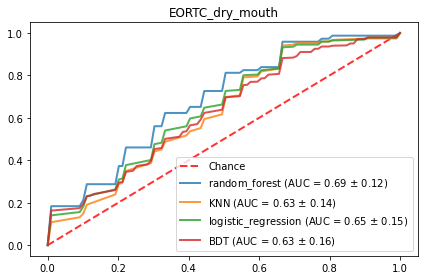

random_forest
Classification report for EORTC_taste, random_forest:
              precision    recall  f1-score   support

           0       0.69      0.53      0.60        94
           1       0.44      0.61      0.51        56

    accuracy                           0.56       150
   macro avg       0.57      0.57      0.55       150
weighted avg       0.60      0.56      0.57       150

KNN
Classification report for EORTC_taste, KNN:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71        94
           1       0.40      0.21      0.28        56

    accuracy                           0.59       150
   macro avg       0.52      0.51      0.49       150
weighted avg       0.55      0.59      0.55       150

logistic_regression
Classification report for EORTC_taste, logistic_regression:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        94
           1       0.61      0.34      0.

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


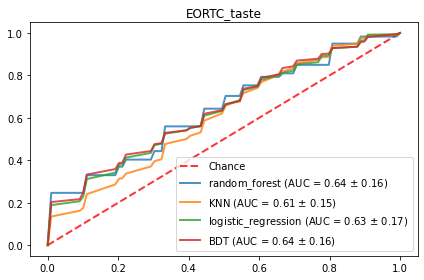

random_forest
Classification report for EORTC_sticky_saliva, random_forest:
              precision    recall  f1-score   support

           0       0.75      0.59      0.66        94
           1       0.39      0.58      0.47        43

    accuracy                           0.58       137
   macro avg       0.57      0.58      0.56       137
weighted avg       0.64      0.58      0.60       137

KNN
Classification report for EORTC_sticky_saliva, KNN:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        94
           1       0.38      0.35      0.36        43

    accuracy                           0.61       137
   macro avg       0.54      0.54      0.54       137
weighted avg       0.61      0.61      0.61       137

logistic_regression
Classification report for EORTC_sticky_saliva, logistic_regression:
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        94
           1     

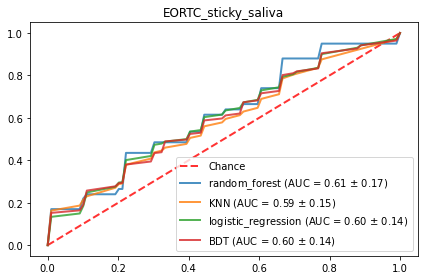

random_forest
Classification report for LENT/SOM_man_xer, random_forest:
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       113
           1       0.45      0.66      0.53        56

    accuracy                           0.62       169
   macro avg       0.61      0.63      0.60       169
weighted avg       0.67      0.62      0.63       169

KNN
Classification report for LENT/SOM_man_xer, KNN:
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       113
           1       0.43      0.21      0.29        56

    accuracy                           0.64       169
   macro avg       0.56      0.54      0.52       169
weighted avg       0.60      0.64      0.61       169

logistic_regression
Classification report for LENT/SOM_man_xer, logistic_regression:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       113
           1       0.45   

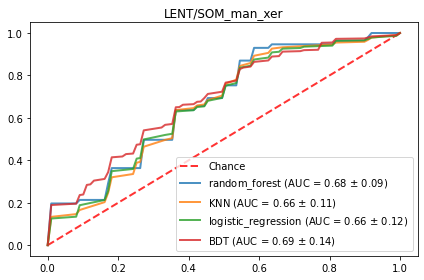

In [146]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curves for different test-train splits
for outcome in outcomes:
    
    # Get data
    f_to_use = list(best_features[outcome])
    df_no_nan = df[f_to_use + [outcome]].dropna()
    X_others = np.array(df_no_nan.drop(outcome, axis=1).values)
    y_others = np.array(df_no_nan[outcome].values)
    
    # Data for BDTs
    f_bdt = best_features_bdt[outcome]
    df_no_nan_bdt = df[f_bdt + [outcome]].dropna()
    X_bdt = np.array(df_no_nan_bdt.drop(outcome, axis=1).values)
    y_bdt = np.array(df_no_nan_bdt[outcome].values)
    
    # k-fold
    cv = StratifiedKFold(n_splits=10)
    
    # Make models
    models = {}
    models['random_forest'] = RandomForestClassifier(
        n_estimators=75, max_features=params['max_features'],
        min_samples_split=params['min_samples_split'],
        max_depth=params['max_depth'],
        class_weight='balanced')
    models['KNN'] = KNeighborsClassifier(n_neighbors=best_params[outcome]['KNN']['n_neighbors'])
    models['logistic_regression'] = LogisticRegression(max_iter=500)
    models['BDT'] = GradientBoostingClassifier(**best_params_gbdt[outcome])
    
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for m, (name, model) in enumerate(models.items()):
        
        print(name)
        if name == 'BDT':
            X = X_bdt
            y = y_bdt
        else:
            X = X_others
            y = y_others

        for i, (train, test) in enumerate(cv.split(X, y)):

            model.fit(X[train], y[train])
            y_predprob = model.predict_proba(X[test])[:, 1]
            fpr, tpr, thresholds = roc_curve(y[test], y_predprob)
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(roc_auc_score(y[test], y_predprob))

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax.plot(mean_fpr, mean_tpr,
                label=r'{} (AUC = {:0.2f} $\pm$ {:0.2f})'.format(name, mean_auc, std_auc),
                lw=2, alpha=.8)
        
        # Print classification report
        y_pred = cross_val_predict(model, X, y, cv=10)
        print(f'Classification report for {outcome}, {name}:')
        print(classification_report(y, y_pred))

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        #ax[m].fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
        #                label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title=outcome)
    ax.legend(loc="lower right")
    plt.tight_layout()
    
    try:
        plt.savefig(f'figs/{outcome}_all.png', dpi=150)
    except FileNotFoundError:
        plt.savefig(f'figs/{outcome.replace("/", "_")}_all.png', dpi=150)
    plt.show()

Mean ROC: 0.712
95.0% confidence interval: 0.602 - 0.817%



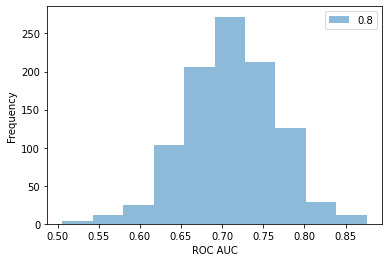

Mean ROC: 0.681
95.0% confidence interval: 0.587 - 0.764%



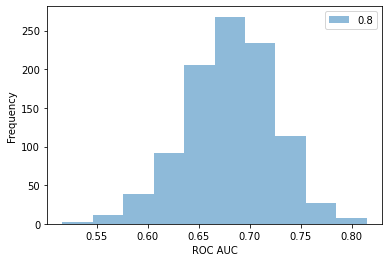

Mean ROC: 0.668
95.0% confidence interval: 0.529 - 0.788%



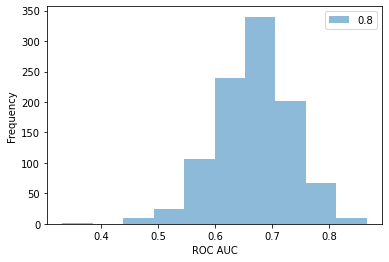

In [ ]:
# Try bootstrapping to estimate random forest performance
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

for outcome in outcomes:
    
    # Make model
    params = best_params[outcome]['random_forest']
    model = RandomForestClassifier(
        n_estimators=100, max_features=params['max_features'],
        min_samples_split=params['min_samples_split'],
        max_depth=params['max_depth'],
        class_weight='balanced')
    
    # Configure bootstrap
    n_iter = 1000
    plt.figure()
    for frac in [0.8]:
        n_size = int(len(df) * frac)
        scores = []

        # Iterate over bootstrap
        for i in range(n_iter):

            # Prepare test and train sets
            f_to_use = list(best_features[outcome])
            df_no_nan = df[f_to_use + [outcome]].dropna()
            df_train = resample(df_no_nan, n_samples=n_size)
            df_test = df_no_nan[~df_no_nan.index.isin(df_train.index)]
            X_train, y_train = get_data(df_train, f_to_use, outcome)
            X_test, y_test = get_data(df_test, f_to_use, outcome)

            # Train and test
            model.fit(X_train, y_train)
            y_pred = model.predict_proba(X_test)[:, 1]
            scores.append(roc_auc_score(y_test, y_pred))

        # Plot ROC scores
        plt.hist(scores, label=frac, alpha=0.5)
        plt.xlabel('ROC AUC')
        plt.ylabel('Frequency')

        # Print mean and confidence interval
        print(f'Mean ROC: {np.mean(scores):.3f}')
        alpha = 0.95
        p = ((1.0 - alpha) / 2.0) * 100
        lower = max(0.0, np.percentile(scores, p))
        p = (alpha + ((1.0 - alpha) / 2.0)) * 100
        upper = min(1.0, np.percentile(scores, p))
        print(f'{alpha * 100}% confidence interval: {lower:.3f} - {upper:.3f}%\n')
    
    plt.legend()
    plt.show()


In [115]:
# Try Leave One Out cross validation
from sklearn.model_selection import LeaveOneOut

for outcome in outcomes:
    
    # Make model
    params = best_params[outcome]['random_forest']
    model = RandomForestClassifier(
        n_estimators=100, max_features=params['max_features'],
        min_samples_split=params['min_samples_split'],
        max_depth=params['max_depth'],
        class_weight='balanced')
    
    # Get data
    X, y = get_data(df, f_to_use, outcome)
    y_true = []
    y_pred_prob = []
    
    # Cross validation
    cv = LeaveOneOut()
    for idx_train, idx_test in cv.split(X):
        
        X_train = X.iloc[idx_train]
        y_train = y.iloc[idx_train]
        X_test = X.iloc[idx_test]
        y_test = y.iloc[idx_test]
        
        model.fit(X_train, y_train)
        y_true.append(y_test.values[0])
        y_pp = model.predict_proba(X_test)
        y_pred_prob.append(y_pp[0][1])
    
    # Calculate ROC
    roc = roc_auc_score(y_true, y_pred_prob)
    print('ROC AUC:', roc)


ROC AUC: 0.7141011443337024
ROC AUC: 0.5949494949494949
ROC AUC: 0.6920863309352518
ROC AUC: 0.6490780141843971


KeyboardInterrupt: 

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

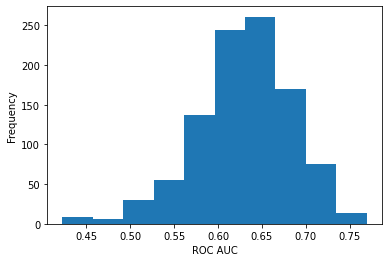

Mean ROC: 0.630
95.0% confidence interval: 0.511 - 0.725%



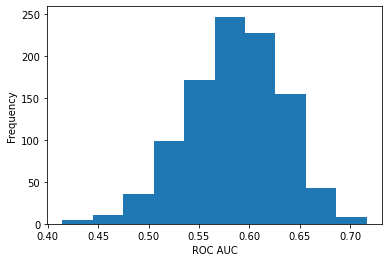

Mean ROC: 0.585
95.0% confidence interval: 0.486 - 0.670%



/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

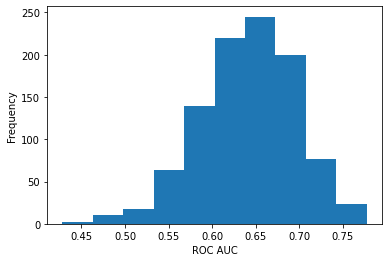

Mean ROC: 0.641
95.0% confidence interval: 0.522 - 0.740%



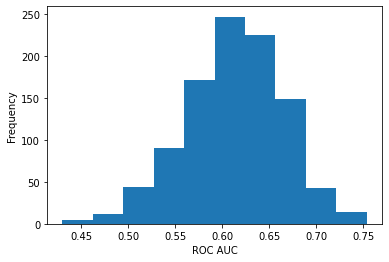

Mean ROC: 0.613
95.0% confidence interval: 0.509 - 0.707%



/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

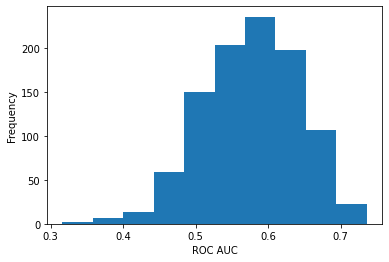

Mean ROC: 0.576
95.0% confidence interval: 0.444 - 0.693%



KeyboardInterrupt: 

In [85]:
# Try MLP
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

for outcome in outcomes:
    
    # Rescale dataset
    f_to_use = list(best_features[outcome])
    df_no_nan = df[f_to_use + [outcome]].dropna()
    sc = StandardScaler()
    df_scaled = pd.DataFrame(sc.fit_transform(df_no_nan[f_to_use]), columns=f_to_use, index=df_no_nan.index)
    df_scaled[outcome] = df_no_nan[outcome]
    
    # Make model
    model = MLPClassifier(max_iter=1500, solver='lbfgs')
    
    # Train and estimate ROC AUC with bootstrapping    
    # Configure bootstrap
    n_iter = 1000
    n_size = int(len(df) * 0.5)
    scores = []
    
    # Iterate over bootstrap
    for i in range(n_iter):
        
        # Prepare test and train sets
        df_train = resample(df_scaled, n_samples=n_size)
        df_test = df_scaled[~df_scaled.index.isin(df_train.index)]
        X_train, y_train = get_data(df_train, f_to_use, outcome)
        X_test, y_test = get_data(df_test, f_to_use, outcome)
        
        # Train and test
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:, 1]
        scores.append(roc_auc_score(y_test, y_pred))
        
    # Plot ROC scores
    plt.figure()
    plt.hist(scores)
    plt.xlabel('ROC AUC')
    plt.ylabel('Frequency')
    plt.show()
    
    # Print mean and confidence interval
    print(f'Mean ROC: {np.mean(scores):.3f}')
    alpha = 0.95
    p = ((1.0 - alpha) / 2.0) * 100
    lower = max(0.0, np.percentile(scores, p))
    p = (alpha + ((1.0 - alpha) / 2.0)) * 100
    upper = min(1.0, np.percentile(scores, p))
    print(f'{alpha * 100}% confidence interval: {lower:.3f} - {upper:.3f}%\n')

In [110]:
y.iloc[j].values[0]

0